# Investigating The Performance of Classification Models on The Prediction of Insurance Claims

## The Data

The dataset used in this analysis, titled "Sample Insurance Claim Prediction Dataset," originates from Kaggle and is based on the "Medical Cost Personal Datasets" with some updated values. It is publicly available here on Kaggle: https://www.kaggle.com/datasets/easonlai/sample-insurance-claim-prediction-dataset/data. 

**Dataset Description:**

The dataset contains the following features related to health and lifestyle attributes of insurance policyholders, which are useful for predicting the likelihood of an insurance claim:

age: The age of the policyholder.

sex: The gender of the policyholder, represented as binary values (female = 0, male = 1).

bmi: Body Mass Index (BMI), which is calculated based on height and weight. BMI provides an indication of bodyweight relative to height, with an ideal range between 18.5 and 25.

children: Number of children or dependents associated with the policyholder.

smoker: Smoking status, with non-smokers represented as 0 and smokers as 1.

region: The residential area of the policyholder within the United States, encoded as northeast = 0, northwest = 1, southeast = 2, southwest = 3.

charges: The medical costs billed to the health insurance, representing the individual medical expenses.

insuranceclaim: The target variable, indicating whether an insurance claim was made (yes = 1, no = 0).

**Data Accuracy and Reliability:**

As a public dataset derived from the "Medical Cost Personal Datasets," it provides realistic yet sample-based values meant for analysis and machine learning model development rather than actual business decision-making. Although the data simulates realistic distributions, it may not represent the complexities of real-world insurance claims accurately. Therefore, while it is valuable for educational and preliminary modeling purposes, real-world implementations should validate the findings against more comprehensive, proprietary datasets.

This dataset offers a balanced selection of features for predictive modeling, covering both demographic and behavioral aspects that could influence medical costs and insurance claim likelihood.

## Project Aim and Objectives

The aim of this project is to develop and evaluate machine learning models that can accurately predict whether an individual will make an insurance claim based on demographic, behavioral, and medical features. This predictive modeling task involves using a variety of data processing and analysis techniques to explore the structure and relationships within the dataset, train classification models, and assess their performance. By applying machine learning methods, we aim to classify policyholders into those likely to make claims and those who are not, thereby offering insights that could be valuable for risk assessment, personalized policy recommendations, and insurance cost management.

The project integrates multiple data processing functionalities, including data scaling, feature analysis, correlation identification, and model evaluation. The classification objective is central: we aim to separate individuals into "claim" and "no claim" categories based on their features, using both logistic regression and decision tree models. Furthermore, we seek to understand the relationships between attributes, such as age, BMI, and smoking status, which may correlate with the likelihood of making a claim. Visualization techniques, including histograms, correlation matrices, and decision tree diagrams, will support these analyses, providing an intuitive understanding of data distributions, correlations, and model structure. By comparing model accuracies, we aim to identify the best performing model while exploring statistical techniques (like McNemar's test and p-value comparisons) to ensure robustness and significance.

#### Specific Objectives

**Objective 1:** Data Preprocessing and Feature Analysis

- Perform data scaling to normalize features and explore the distribution of each feature.
- Conduct feature analysis to identify outliers, analyze the range and distribution of values, and assess feature correlations using a correlation matrix.

**Objective 2:** Decision Tree Model Development and Evaluation

- Train a decision tree model, adjusting max_depth to prevent overfitting and setting a splitting criterion like Gini impurity or entropy.
- Visualize the tree structure, assess classification errors, and calculate accuracy, precision, recall, and F1 scores to understand the model’s strengths and weaknesses.

**Objective 3:** XGBoost Model Development

- Split the data into training and testing sets, and train an XGBoost model.
- Optimise paremeters, investigate accuracy, precision, recall etc. 

**Objective 4:** Model Comparison and Statistical Analysis

- Use statistical tests, such as McNemar's test and individual z-scores, to compare model performance.
- Visualize results with plots and discuss findings based on p-values, aiming to identify the best model for predicting insurance claims.

## System Design

### Architecture

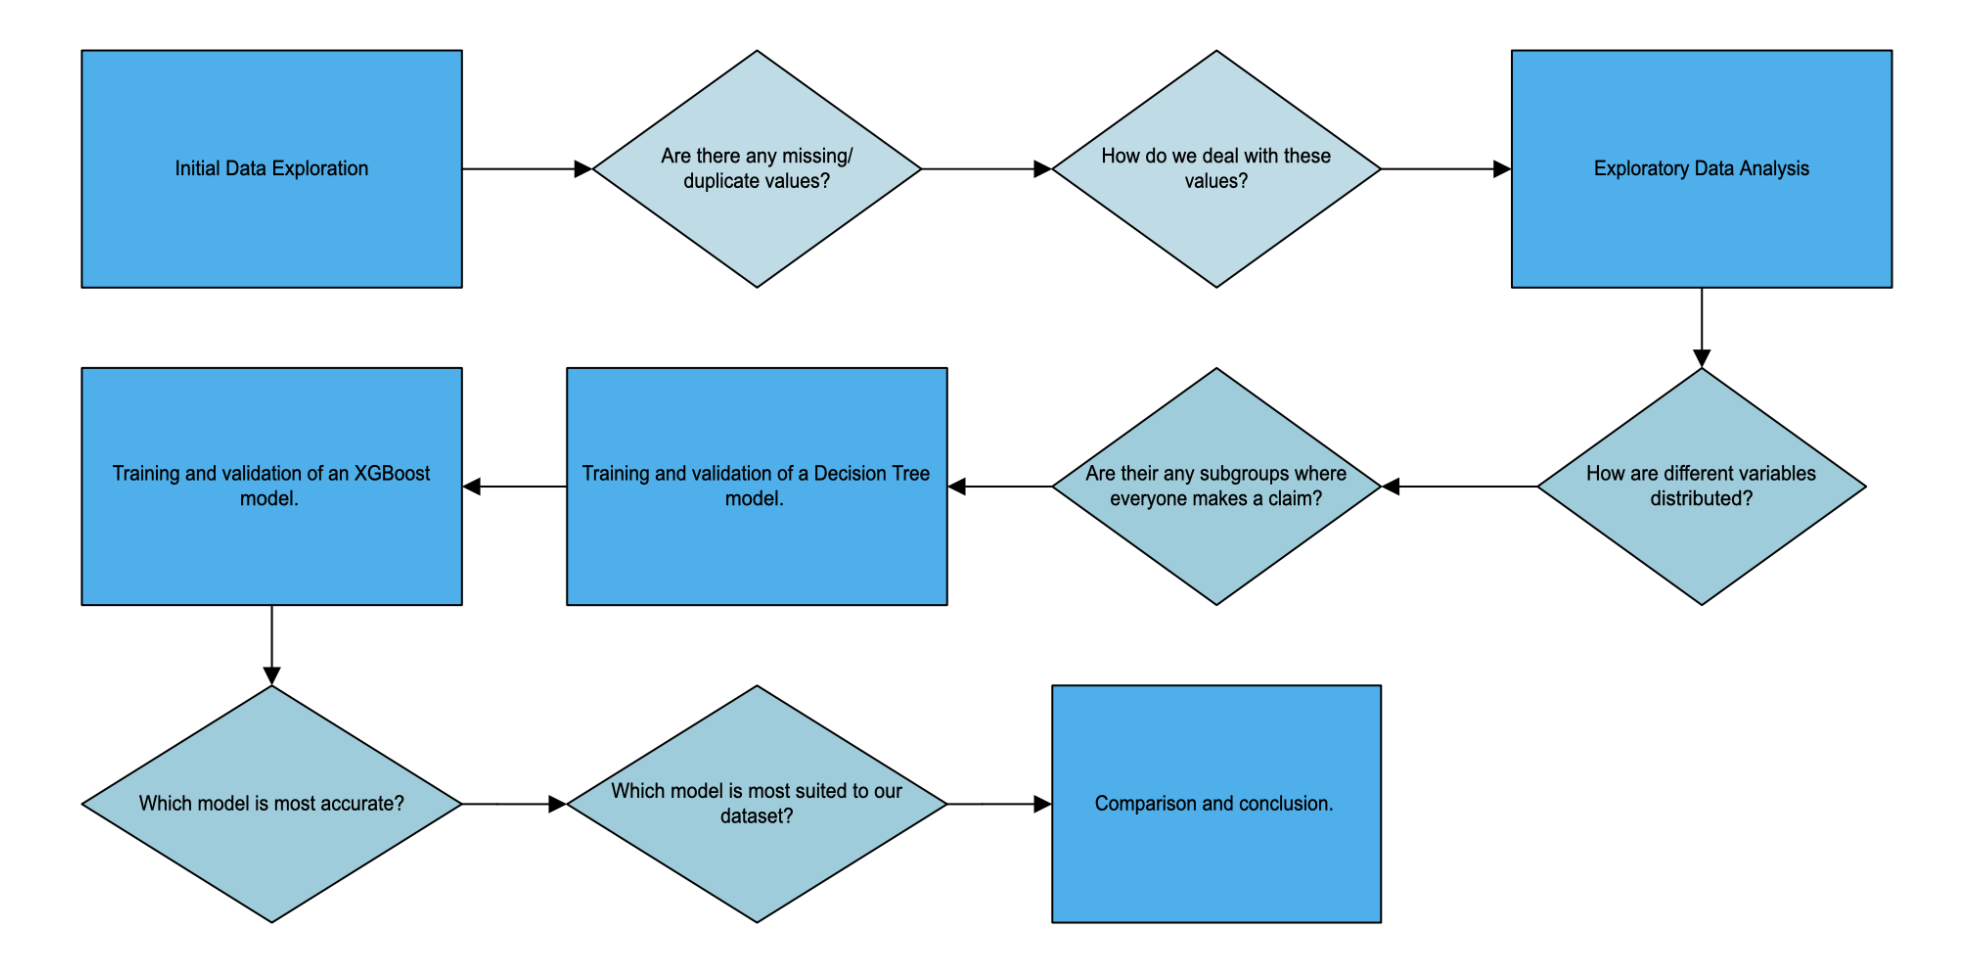

This flowchart outlines the steps for our project focused on predictive modeling and comparison. It begins with Initial Data Exploration, where the dataset is assessed for missing or duplicate values, followed by strategies for handling these issues. After cleaning, Exploratory Data Analysis (EDA) identifies variable distributions and subgroup patterns, such as those with universally high outcomes (e.g., all making claims).

Once insights are gathered, two predictive models are trained and validated: a Decision Tree and an XGBoost model. Both models are evaluated for accuracy and suitability to the dataset. The results guide a comparison to determine which model performs best in terms of predictive power and alignment with the dataset characteristics. Finally, the findings are synthesized in the Comparison and Conclusion stage to recommend the most appropriate solution based on the analysis and discusses how and why the accuracies differ between the models. This structured approach ensures thorough data preparation, modeling, and evaluation.

### Processing Modules and Algorithms

- **Cleaning and Preprocessing the Data:** Modules such as Pandas and NumPy used to identify and then remove/replace the missing/incorrect values. 
- **Dataset Manipulation:** Datasets were manipulated (dropping target variables etc) using Pandas.
- **Constructing Special Data-Structures:** Decision Tree built and used using packages from scikit.learn. Performance scores, such as accuracy, precision, recall and F1 score also calculated using modules from scikit.learn. XGBoost classification carried out using the XGBoost module. 
- **Comparison of Model Performance:** Models compared and assessment carried out for whether there is a statisitically significant difference in model performance. Values from scipy.stats are used to calculate p-values in McNemar's test. 

## Importing Libraries

In [1]:
!pip install xgboost
!pip install --upgrade numexpr --user
!pip install mlxtend

In [2]:
import numexpr
import scipy.stats
from mlxtend.evaluate import combined_ftest_5x2cv
from scipy.stats import binomtest
from mlxtend.evaluate import mcnemar
from mlxtend.evaluate import mcnemar_table
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, learning_curve, StratifiedKFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import plot_importance

## Data Cleaning

Basic cleaning of the data to make sure it is suitable to work with:

In [3]:
df = pd.read_csv('insurance2.csv')
df.info()
df.shape
df.head()
df_clean = df.copy(deep=True)
dup = df_clean.duplicated().sum()
print("Number of duplicate rows", dup)
duplicates = df_clean[df_clean.duplicated(keep=False)]
print("Duplicated rows:")
print(duplicates)
df_clean.drop_duplicates(inplace=True)
display(df_clean)
rows_with_missing = df_clean[df_clean.isnull().any(axis=1)]
print(rows_with_missing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB
Number of duplicate rows 1
Duplicated rows:
     age  sex    bmi  children  smoker  region    charges  insuranceclaim
195   19    1  30.59         0       0       1  1639.5631               1
581   19    1  30.59         0       0       1  1639.5631               1


age  sex     bmi  children  smoker  region      charges  insuranceclaim
0      19    0  27.900         0       1       3  16884.92400               1
1      18    1  33.770         1       0       2   1725.55230               1
2      28    1  33.000         3       0       2   4449.46200               0
3      33    1  22.705         0       0       1  21984.47061               0
4      32    1  28.880         0       0       1   3866.85520               1
...   ...  ...     ...       ...     ...     ...          ...             ...
1333   50    1  30.970         3       0       1  10600.54830               0
1334   18    0  31.920         0       0       0   2205.98080               1
1335   18    0  36.850         0       0       2   1629.83350               1
1336   21    0  25.800         0       0       3   2007.94500               0
1337   61    0  29.070         0       1       1  29141.36030               1

[1337 rows x 8 columns]

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, insuranceclaim]
Index: []


## Suitability Checks

### Model Selection

#### 1. Logistic Regression

##### When to Use:
- **Linear Relationships:**
  - If the relationship between the features and the log-odds of the target class is approximately linear.
- **Small to Medium Datasets:**
  - Performs well with fewer samples and features, as long as the relationships are clear and well-separated.
- **Balanced Datasets:**
  - Works well when the target classes are roughly balanced. If not, consider adding class weights or oversampling the minority class.
- **Interpretability:**
  - Use logistic regression when you need interpretable results, like understanding the weight of each feature on the predicted outcome.

##### When Not to Use:
- **Non-linear Relationships:**
  - Struggles to model non-linear dependencies unless features are transformed (e.g., polynomial or interaction terms).
- **High-dimensional or Sparse Data:**
  - Performs poorly with too many features, especially irrelevant ones, unless feature selection or dimensionality reduction is applied.
- **Highly Imbalanced Data:**
  - Without adjustments, logistic regression will predict the majority class most of the time, leading to poor performance.
- **Multicollinearity:**
  - If features are highly correlated, logistic regression may produce unstable coefficient estimates unless regularisation is applied.

---

#### 2. Decision Trees
##### When to Use:
- **Simple Relationships:**
  - Effective for datasets where relationships between features and the target are straightforward and can be divided into clear decision rules.
- **Small Datasets:**
  - Works well when you have limited data and don't want to overcomplicate the model.
- **Mixed Data Types:**
  - Handles categorical and numerical features without requiring extensive preprocessing.
- **Interpretability:**
  - Useful when decisions need to be easily explained.

##### When Not to Use:
- **Noisy Data:**
  - Decision trees are prone to overfitting, especially with noise or outliers in the data.
- **Complex Patterns:**
  - Struggles to capture non-linear or intricate relationships without becoming overly complex.
- **Large Datasets:**
  - A single decision tree can become unwieldy and less robust compared to ensemble methods like Random Forest or XGBoost.

---

#### 3. Random Forests
##### When to Use:
- **Complex Relationships:**
  - Excellent for capturing non-linear dependencies and interactions between variables.
- **Medium to Large Datasets:**
  - Can handle a larger volume of data and features without significant performance drops.
- **Feature Importance:**
  - When you need insights on which features contribute most to predictions.
- **Robustness:**
  - Ideal for datasets with noise or missing values, as averaging across trees reduces overfitting.
- **Imbalanced Datasets:**
  - Performs decently with class imbalances, especially with adjustments (e.g., class weights or resampling).

##### When Not to Use:
- **Small Datasets:**
  - Risk of overfitting due to its complexity and ensemble nature.
- **Interpretability:**
  - Predictions are harder to explain due to the ensemble nature of the model.

---

#### 4. XGBoost
##### When to Use:
- **Large and Complex Datasets:**
  - Handles many features and observations effectively, even with non-linear relationships.
- **Imbalanced Data:**
  - Provides tools like scale_pos_weight to handle class imbalances effectively.
- **Noisy Data:**
  - Regularisation techniques in XGBoost (e.g., L1, L2 regularisation) make it robust to overfitting.

##### When Not to Use:
- **Small Datasets:**
  - May overfit when the dataset is too small to generalise effectively.
- **Interpretability:**
  - While feature importance is available, the complexity of boosted trees makes it harder to explain individual predictions.

---

I have condensed the above into some simple checks that I can perform on the data set in order to better understand which model to use

1. Check for Linear Relationships

2. Assess Dataset Size

3. Check Class Balance

4. Detect Noise or Outliers

5. Assess Interpretability Needs

6. Check for multicoliniarity

---

Since we have already observed low multicolinearity earlier in this report, I will examine using the following decision table.

#### Decision Table for Model Selection:

| Dataset Check                | Best Model                                   | Avoid                                           |
|------------------------------|---------------------------------------------|------------------------------------------------|
| **Linear relationships**     | Logistic Regression                         | Random Forests, XGBoost                        |
| **Non-linear relationships** | Random Forests, XGBoost                     | Logistic Regression                            |
| **Small dataset**            | Logistic Regression, Decision Trees         | Random Forests, XGBoost                        |
| **Large dataset**            | Random Forests, XGBoost                     | Logistic Regression                            |
| **Noisy data or outliers**   | Random Forests, XGBoost                     | Decision Trees, Logistic Regression            |
| **Balanced target class**  | Logistic Regression, Decision Trees, Random Forests, XGBoost | None                            |
| **Imbalanced target class**| Random Forests, XGBoost (with class weights)| Logistic Regression (without weights)            |
| **Need for interpretability**| Logistic Regression, Decision Trees         | Random Forests, XGBoost                        |

### Checks for Linear Relationships with Target Variable

Bins are specific intervals used to model each feature separately. Below, both equal frequency and equal size have been used on each feature separately. This is because some of our data is skewed, and other data is consistent. Using both is good because we can produce more results. From these results we can then refine them to choose which is the best. Looking at the log graphs, we ideally want the graph which represents the most linear correlation.
Equal frequency is where each bin contains an equal number of data points, and equal size is where each bin has an equal width of intervals.

Although age is technically categorical, we are classifying it as continuous to reduce dimensionality. We have also made it continuous to allow it to work better with decision trees. If a feature has over $10$ categories, it is possible to class it as continuous. Age has $47$ categories. Further on in this paper, principal component analysis is used. This also helps to reduce dimensionaliy.

Binned Results for age (Equal Size):


Binned_Age_Size  Mean_Target      Odds  Log_Odds
0  (17.999, 22.6]     0.647059  1.833333  0.606136
1    (22.6, 27.2]     0.528571  1.121212  0.114410
2    (27.2, 31.8]     0.366972  0.579710 -0.545227
3    (31.8, 36.4]     0.406250  0.684211 -0.379490
4    (36.4, 41.0]     0.434109  0.767123 -0.265108
5    (41.0, 45.6]     0.700000  2.333333  0.847298
6    (45.6, 50.2]     0.625000  1.666667  0.510826
7    (50.2, 54.8]     0.684211  2.166667  0.773190
8    (54.8, 59.4]     0.703125  2.368421  0.862224
9    (59.4, 64.0]     0.719298  2.562500  0.940983

Binned Results for age (Equal Frequency):


Binned_Age_Full  Mean_Target      Odds  Log_Odds
0  (17.999, 19.0]     0.625000  1.666667  0.510826
1    (19.0, 24.0]     0.645390  1.820000  0.598837
2    (24.0, 29.0]     0.446043  0.805195 -0.216671
3    (29.0, 34.0]     0.393939  0.650000 -0.430783
4    (34.0, 39.0]     0.408000  0.689189 -0.372239
5    (39.0, 44.0]     0.600000  1.500000  0.405465
6    (44.0, 49.0]     0.631944  1.716981  0.540568
7    (49.0, 54.0]     0.678322  2.108696  0.746070
8    (54.0, 59.0]     0.703125  2.368421  0.862224
9    (59.0, 64.0]     0.719298  2.562500  0.940983

Binned Results for BMI (Equal Size):


Binned_BMI_Size  Mean_Target      Odds  Log_Odds
0  (15.959000000000001, 19.677]     0.300000  0.428571 -0.847298
1              (19.677, 23.394]     0.181102  0.221154 -1.508897
2              (23.394, 27.111]     0.358974  0.560000 -0.579818
3              (27.111, 30.828]     0.603774  1.523810  0.421213
4              (30.828, 34.545]     0.704861  2.388235  0.870555
5              (34.545, 38.262]     0.794872  3.875000  1.354546
6              (38.262, 41.979]     0.791667  3.800000  1.335001
7              (41.979, 45.696]     0.718750  2.555556  0.938270
8              (45.696, 49.413]     1.000000       inf       inf
9               (49.413, 53.13]     1.000000       inf       inf

Binned Results for BMI (Equal Frequency):


Binned_BMI_Full  Mean_Target      Odds  Log_Odds
0  (15.959000000000001, 22.99]     0.220588  0.283019 -1.262242
1              (22.99, 25.313]     0.174242  0.211009 -1.555854
2             (25.313, 27.348]     0.511278  1.046154  0.045120
3             (27.348, 28.791]     0.619403  1.627451  0.487015
4               (28.791, 30.4]     0.601449  1.509091  0.411507
5               (30.4, 32.066]     0.697674  2.307692  0.836248
6             (32.066, 33.668]     0.649254  1.851064  0.615761
7              (33.668, 35.86]     0.770370  3.354839  1.210404
8              (35.86, 38.626]     0.810606  4.280000  1.453953
9              (38.626, 53.13]     0.798507  3.962963  1.376992

Binned Results for charges (Equal Size):


Binned_Charges_Size  Mean_Target       Odds  Log_Odds
0    (1121.873, 7386.729]     0.435514   0.771523 -0.259389
1   (7386.729, 13651.585]     0.582915   1.397590  0.334750
2   (13651.585, 19916.44]     0.651163   1.866667  0.624154
3   (19916.44, 26181.296]     0.697674   2.307692  0.836248
4  (26181.296, 32446.151]     0.685714   2.181818  0.780159
5  (32446.151, 38711.006]     0.915254  10.800000  2.379546
6  (38711.006, 44975.862]     1.000000        inf       inf
7  (44975.862, 51240.717]     1.000000        inf       inf
8  (51240.717, 57505.573]     1.000000        inf       inf
9  (57505.573, 63770.428]     1.000000        inf       inf

Binned Results for charges (Equal Frequency):


Binned_Charges_Full  Mean_Target       Odds  Log_Odds
0    (1121.873, 2358.525]     0.671642   2.045455  0.715620
1    (2358.525, 3996.427]     0.500000   1.000000  0.000000
2    (3996.427, 5487.503]     0.248120   0.330000 -1.108663
3    (5487.503, 7390.472]     0.320896   0.472527 -0.749659
4    (7390.472, 9386.161]     0.544776   1.196721  0.179586
5   (9386.161, 11405.771]     0.609023   1.557692  0.443205
6  (11405.771, 13780.639]     0.597015   1.481481  0.393043
7  (13780.639, 20269.217]     0.654135   1.891304  0.637267
8  (20269.217, 34832.742]     0.723881   2.621622  0.963793
9  (34832.742, 63770.428]     0.977612  43.666667  3.776585

Binned Results for children:


children  Mean_Target      Odds  Log_Odds
0         0     0.806283  4.162162  1.426035
1         1     0.533951  1.145695  0.136012
2         2     0.391667  0.643836 -0.440312
3         3     0.286624  0.401786 -0.911836
4         4     0.160000  0.190476 -1.658228
5         5     0.222222  0.285714 -1.252763

Binned Results for region:


region  Mean_Target      Odds  Log_Odds
0       0     0.592593  1.454545  0.374693
1       1     0.500000  1.000000  0.000000
2       2     0.673077  2.058824  0.722135
3       3     0.563077  1.288732  0.253659

Binned Results for smoker:


smoker  Mean_Target     Odds  Log_Odds
0       0     0.501411  1.00566  0.005644
1       1     0.908759  9.96000  2.298577

Binned Results for sex:


sex  Mean_Target      Odds  Log_Odds
0    0     0.569486  1.322807  0.279756
1    1     0.600000  1.500000  0.405465

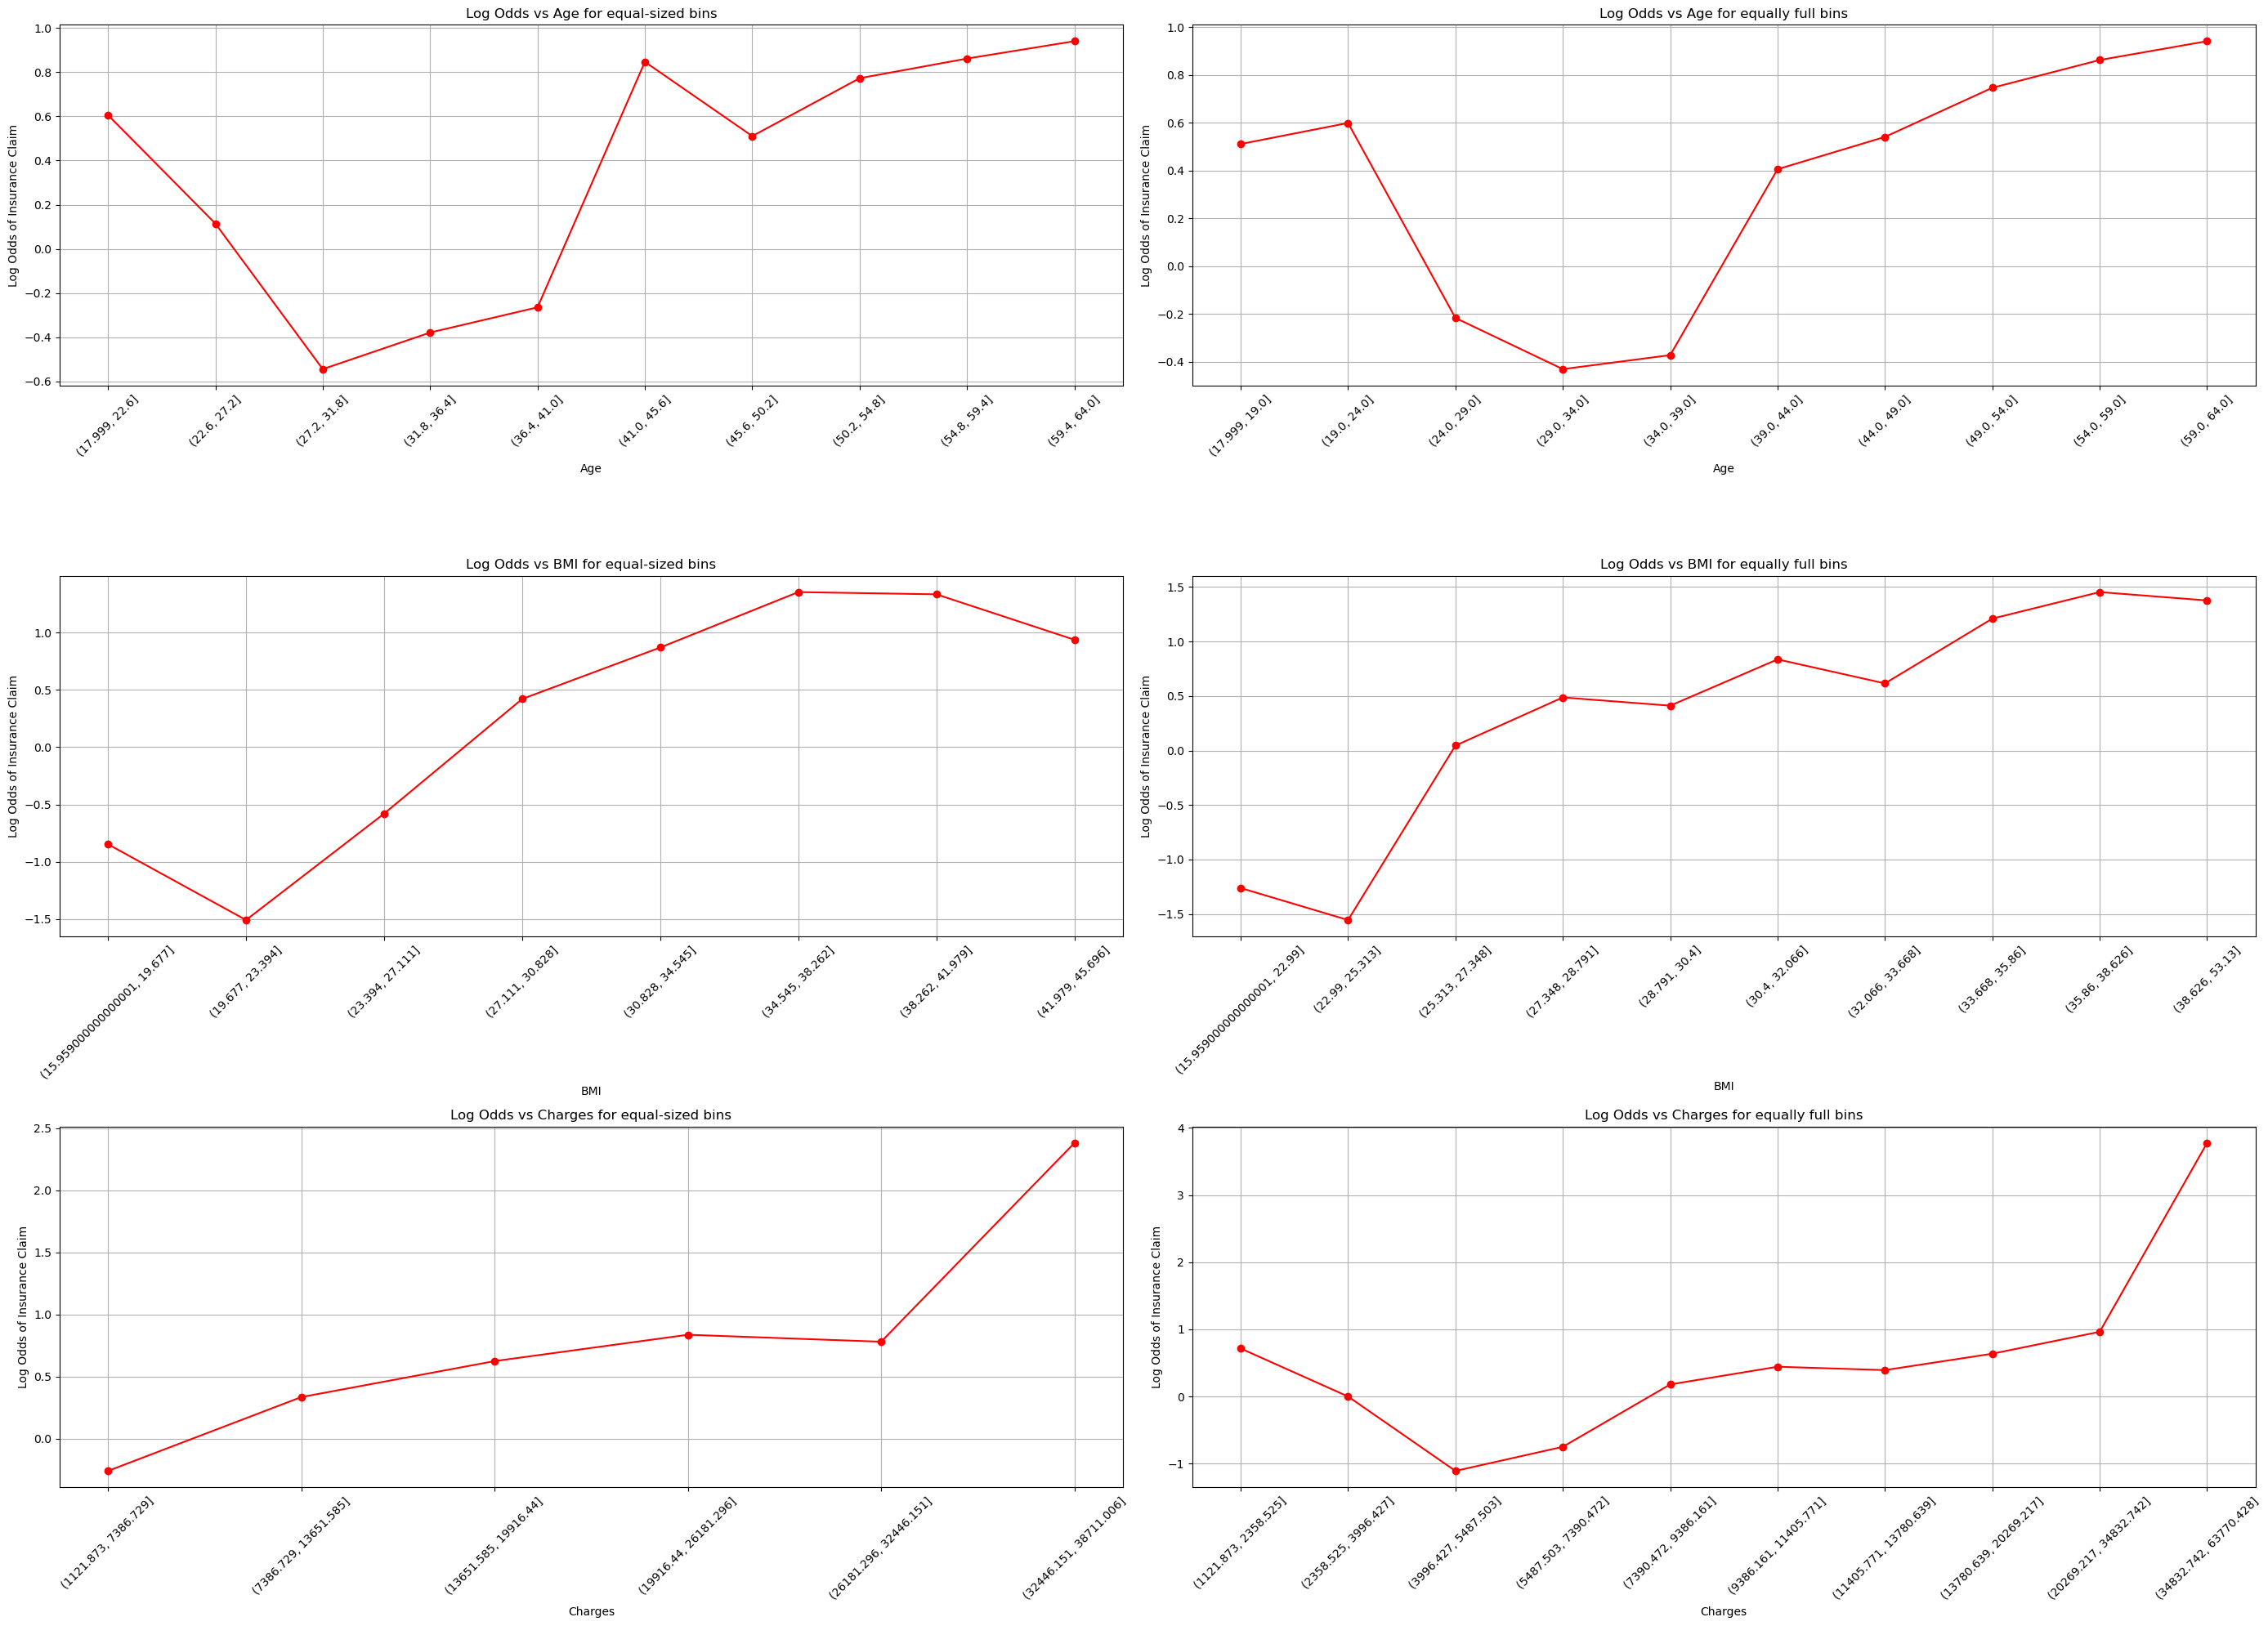

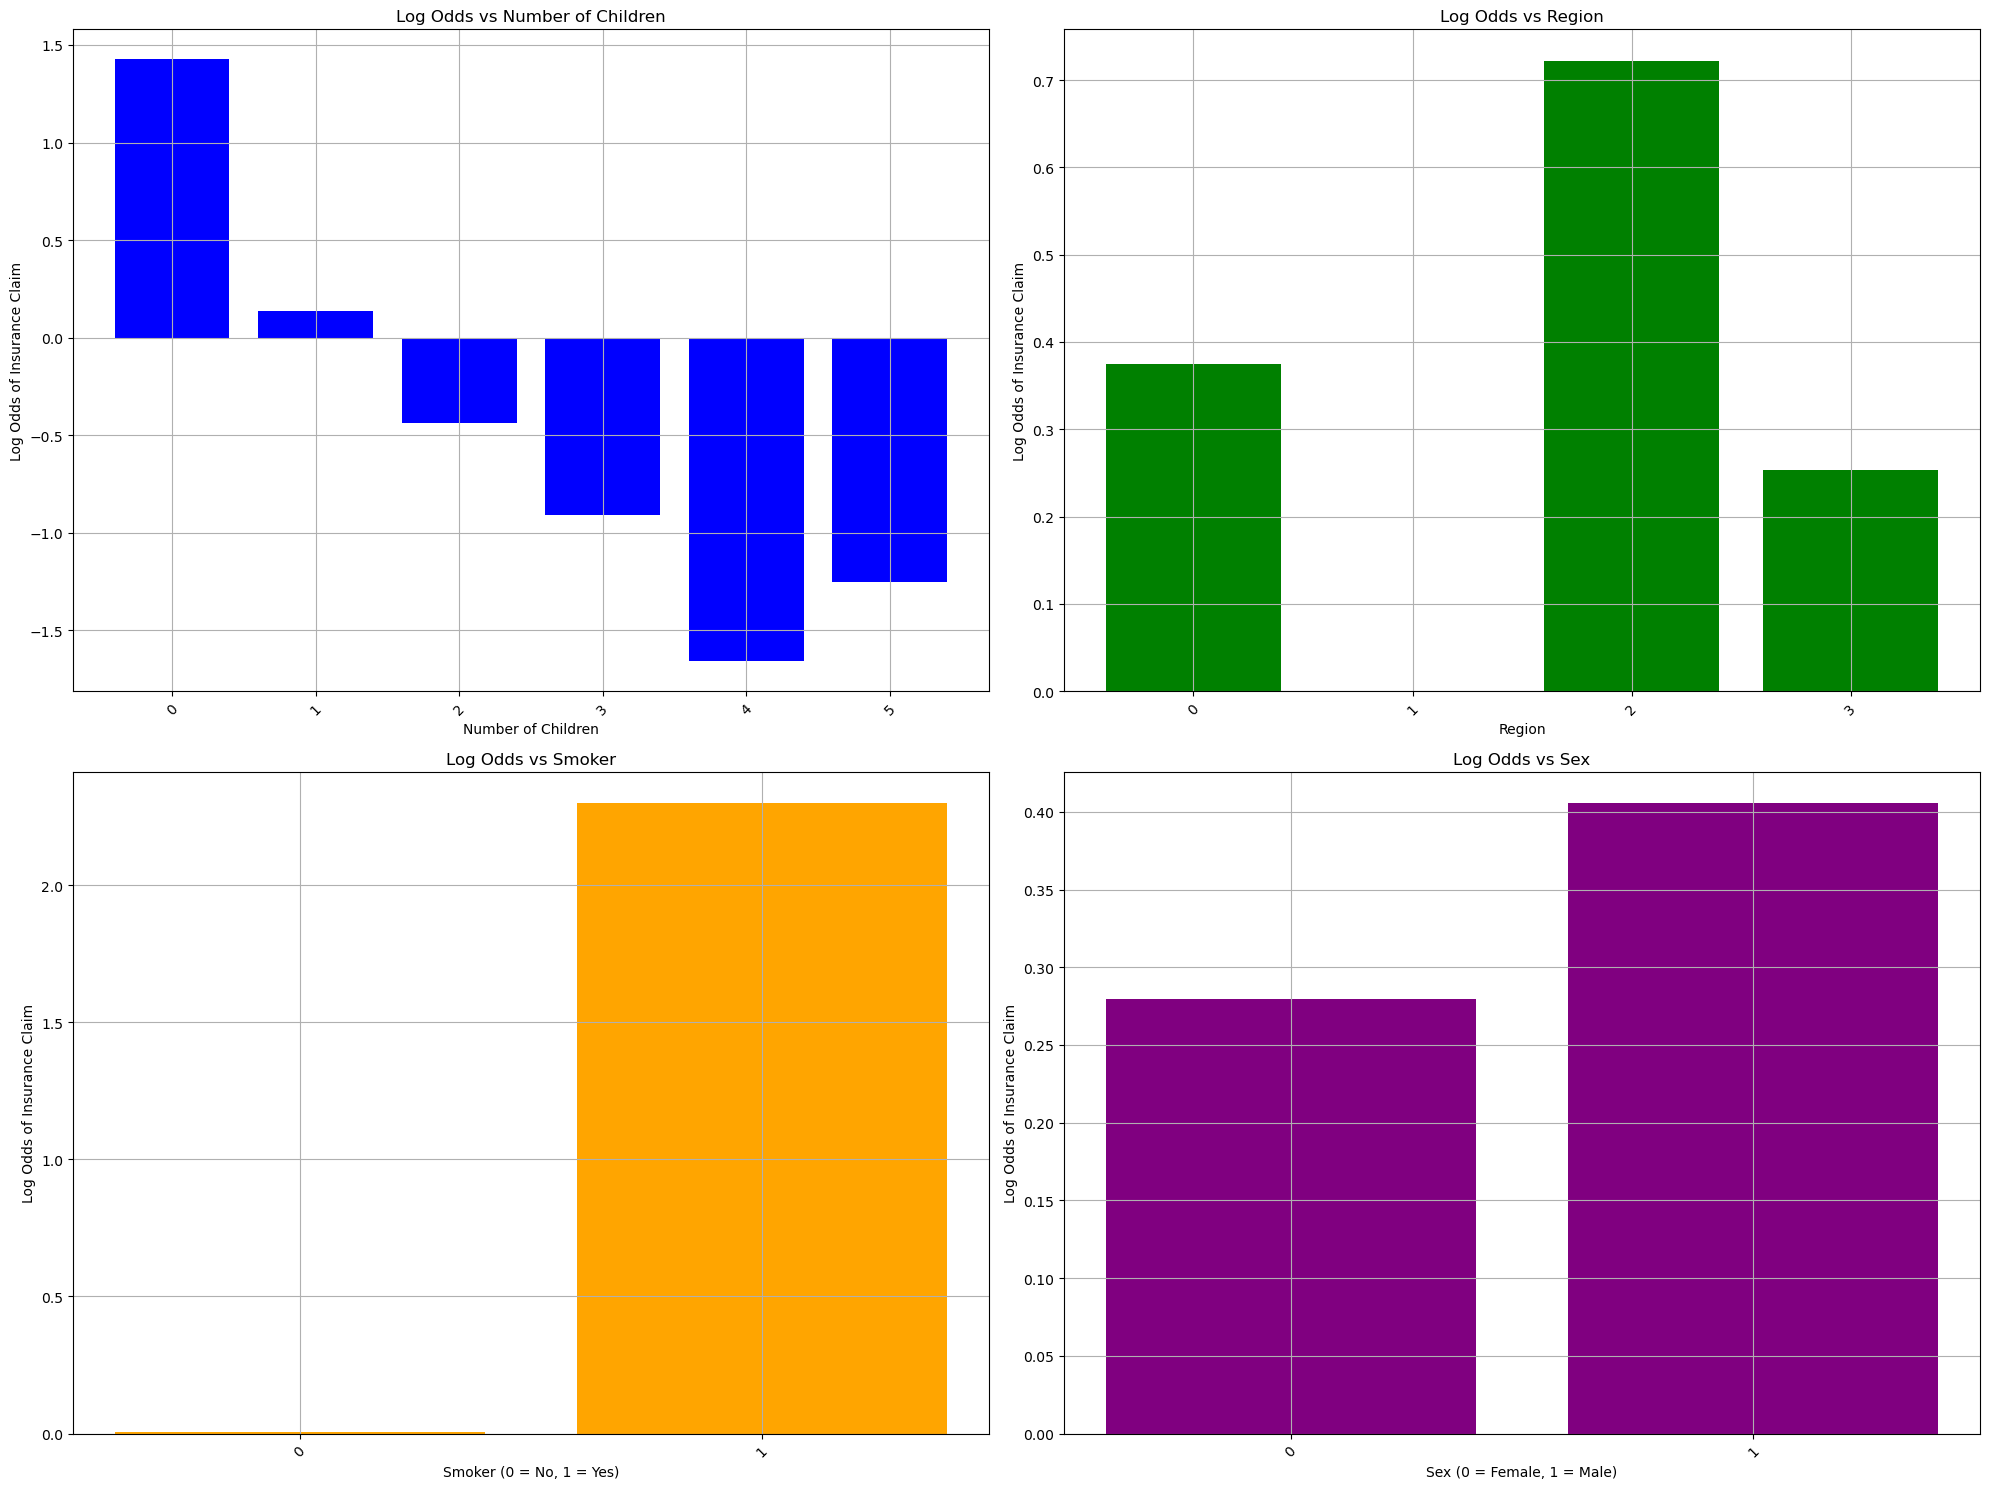

In [4]:
df_unscaled = df_clean.copy(deep=True)
age = df_unscaled[["age", "insuranceclaim"]].copy(deep=True)
bin_edges_age = np.linspace(age["age"].min(), age["age"].max(), 11)
age['Binned_Age_Size'] = pd.cut(age["age"], bins=bin_edges_age, include_lowest=True)
age['Binned_Age_Full'] = pd.qcut(age["age"], q=10)
age_grouped_size = age.groupby('Binned_Age_Size', observed=True).agg(Mean_Target=('insuranceclaim', 'mean')).reset_index()
age_grouped_size['Odds'] = age_grouped_size['Mean_Target'] / (1 - age_grouped_size['Mean_Target'])
age_grouped_size['Log_Odds'] = np.log(age_grouped_size['Odds'])
age_grouped_full = age.groupby('Binned_Age_Full', observed=True).agg(Mean_Target=('insuranceclaim', 'mean')).reset_index()
age_grouped_full['Odds'] = age_grouped_full['Mean_Target'] / (1 - age_grouped_full['Mean_Target'])
age_grouped_full['Log_Odds'] = np.log(age_grouped_full['Odds'])

bmi = df_unscaled[["bmi", "insuranceclaim"]].copy(deep=True)
bin_edges_bmi = np.linspace(bmi["bmi"].min(), bmi["bmi"].max(), 11)  # 10 bins
bmi['Binned_BMI_Size'] = pd.cut(bmi["bmi"], bins=bin_edges_bmi, include_lowest=True)
bmi['Binned_BMI_Full'] = pd.qcut(bmi["bmi"], q=10)
bmi_grouped_size = bmi.groupby('Binned_BMI_Size', observed=True).agg(Mean_Target=('insuranceclaim', 'mean')).reset_index()
bmi_grouped_size['Odds'] = bmi_grouped_size['Mean_Target'] / (1 - bmi_grouped_size['Mean_Target'])
bmi_grouped_size['Log_Odds'] = np.log(bmi_grouped_size['Odds'])
bmi_grouped_full = bmi.groupby('Binned_BMI_Full', observed=True).agg(Mean_Target=('insuranceclaim', 'mean')).reset_index()
bmi_grouped_full['Odds'] = bmi_grouped_full['Mean_Target'] / (1 - bmi_grouped_full['Mean_Target'])
bmi_grouped_full['Log_Odds'] = np.log(bmi_grouped_full['Odds'])

charges = df_unscaled[["charges", "insuranceclaim"]].copy(deep=True)
bin_edges_charges = np.linspace(charges["charges"].min(), charges["charges"].max(), 11)  # 10 bins
charges['Binned_Charges_Size'] = pd.cut(charges["charges"], bins=bin_edges_charges, include_lowest=True)
charges['Binned_Charges_Full'] = pd.qcut(charges["charges"], q=10)
charges_grouped_size = charges.groupby('Binned_Charges_Size', observed=True).agg(Mean_Target=('insuranceclaim', 'mean')).reset_index()
charges_grouped_size['Odds'] = charges_grouped_size['Mean_Target'] / (1 - charges_grouped_size['Mean_Target'])
charges_grouped_size['Log_Odds'] = np.log(charges_grouped_size['Odds'])
charges_grouped_full = charges.groupby('Binned_Charges_Full', observed=True).agg(Mean_Target=('insuranceclaim', 'mean')).reset_index()
charges_grouped_full['Odds'] = charges_grouped_full['Mean_Target'] / (1 - charges_grouped_full['Mean_Target'])
charges_grouped_full['Log_Odds'] = np.log(charges_grouped_full['Odds'])

children = df_unscaled[["children", "insuranceclaim"]].copy(deep=True)
children_grouped = children.groupby('children', observed=True).agg(Mean_Target=('insuranceclaim', 'mean')).reset_index()
children_grouped['Odds'] = children_grouped['Mean_Target'] / (1 - children_grouped['Mean_Target'])
children_grouped['Log_Odds'] = np.log(children_grouped['Odds'])
region = df_unscaled[["region", "insuranceclaim"]].copy(deep=True)
region_grouped = region.groupby('region', observed=True).agg(Mean_Target=('insuranceclaim', 'mean')).reset_index()
region_grouped['Odds'] = region_grouped['Mean_Target'] / (1 - region_grouped['Mean_Target'])
region_grouped['Log_Odds'] = np.log(region_grouped['Odds'])

smoker = df_unscaled[["smoker", "insuranceclaim"]].copy(deep=True)
smoker_grouped = smoker.groupby("smoker", observed=True).agg(Mean_Target=('insuranceclaim', 'mean')).reset_index()
smoker_grouped['Odds'] = smoker_grouped['Mean_Target'] / (1 - smoker_grouped['Mean_Target'])
smoker_grouped['Log_Odds'] = np.log(smoker_grouped['Odds'])

sex = df_unscaled[["sex", "insuranceclaim"]].copy(deep=True)
sex_grouped = sex.groupby("sex", observed=True).agg(Mean_Target=('insuranceclaim', 'mean')).reset_index()
sex_grouped['Odds'] = sex_grouped['Mean_Target'] / (1 - sex_grouped['Mean_Target'])
sex_grouped['Log_Odds'] = np.log(sex_grouped['Odds'])

print(f"Binned Results for age (Equal Size):")
display(age_grouped_size)
print(f"Binned Results for age (Equal Frequency):")
display(age_grouped_full)
print(f"Binned Results for BMI (Equal Size):")
display(bmi_grouped_size)
print(f"Binned Results for BMI (Equal Frequency):")
display(bmi_grouped_full)
print(f"Binned Results for charges (Equal Size):")
display(charges_grouped_size)
print(f"Binned Results for charges (Equal Frequency):")
display(charges_grouped_full)
print(f"Binned Results for children:")
display(children_grouped)
print(f"Binned Results for region:")
display(region_grouped)
print(f"Binned Results for smoker:")
display(smoker_grouped)
print(f"Binned Results for sex:")
display(sex_grouped)

fig1, ax1 = plt.subplots(nrows=3, ncols=2, figsize=(28, 20))  # 3 rows, 2 columns

ax1[0, 0].plot(age_grouped_size['Binned_Age_Size'].astype(str), age_grouped_size['Log_Odds'], marker='o', linestyle='-', color='red')
ax1[0, 0].set_title('Log Odds vs Age for equal-sized bins')
ax1[0, 0].set_xlabel('Age')
ax1[0, 0].tick_params(axis='x', labelrotation=45)
ax1[0, 0].set_ylabel('Log Odds of Insurance Claim')
ax1[0, 0].grid()

ax1[0, 1].plot(age_grouped_full['Binned_Age_Full'].astype(str), age_grouped_full['Log_Odds'], marker='o', linestyle='-', color='red')
ax1[0, 1].set_title('Log Odds vs Age for equally full bins')
ax1[0, 1].set_xlabel('Age')
ax1[0, 1].tick_params(axis='x', labelrotation=45)
ax1[0, 1].set_ylabel('Log Odds of Insurance Claim')
ax1[0, 1].grid()

ax1[1, 0].plot(bmi_grouped_size['Binned_BMI_Size'].astype(str), bmi_grouped_size['Log_Odds'], marker='o', linestyle='-', color='red')
ax1[1, 0].set_title('Log Odds vs BMI for equal-sized bins')
ax1[1, 0].set_xlabel('BMI')
ax1[1, 0].tick_params(axis='x', labelrotation=45)
ax1[1, 0].set_ylabel('Log Odds of Insurance Claim')
ax1[1, 0].grid()

ax1[1, 1].plot(bmi_grouped_full['Binned_BMI_Full'].astype(str), bmi_grouped_full['Log_Odds'], marker='o', linestyle='-', color='red')
ax1[1, 1].set_title('Log Odds vs BMI for equally full bins')
ax1[1, 1].set_xlabel('BMI')
ax1[1, 1].tick_params(axis='x', labelrotation=45)
ax1[1, 1].set_ylabel('Log Odds of Insurance Claim')
ax1[1, 1].grid()

ax1[2, 0].plot(charges_grouped_size['Binned_Charges_Size'].astype(str), charges_grouped_size['Log_Odds'], marker='o', linestyle='-', color='red')
ax1[2, 0].set_title('Log Odds vs Charges for equal-sized bins')
ax1[2, 0].set_xlabel('Charges')
ax1[2, 0].tick_params(axis='x', labelrotation=45)
ax1[2, 0].set_ylabel('Log Odds of Insurance Claim')
ax1[2, 0].grid()

ax1[2, 1].plot(charges_grouped_full['Binned_Charges_Full'].astype(str), charges_grouped_full['Log_Odds'], marker='o', linestyle='-', color='red')
ax1[2, 1].set_title('Log Odds vs Charges for equally full bins')
ax1[2, 1].set_xlabel('Charges')
ax1[2, 1].tick_params(axis='x', labelrotation=45)
ax1[2, 1].set_ylabel('Log Odds of Insurance Claim')
ax1[2, 1].grid()

plt.tight_layout()
plt.show()

fig2, ax2 = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))  # 2 rows, 2 columns

ax2[0, 0].bar(children_grouped['children'].astype(str), children_grouped['Log_Odds'], color='blue')
ax2[0, 0].set_title('Log Odds vs Number of Children')
ax2[0, 0].set_xlabel('Number of Children')
ax2[0, 0].tick_params(axis='x', labelrotation=45)
ax2[0, 0].set_ylabel('Log Odds of Insurance Claim')
ax2[0, 0].grid()

ax2[0, 1].bar(region_grouped['region'].astype(str), region_grouped['Log_Odds'], color='green')
ax2[0, 1].set_title('Log Odds vs Region')
ax2[0, 1].set_xlabel('Region')
ax2[0, 1].tick_params(axis='x', labelrotation=45)
ax2[0, 1].set_ylabel('Log Odds of Insurance Claim')
ax2[0, 1].grid()

ax2[1, 0].bar(smoker_grouped['smoker'].astype(str), smoker_grouped['Log_Odds'], color='orange')
ax2[1, 0].set_title('Log Odds vs Smoker')
ax2[1, 0].set_xlabel('Smoker (0 = No, 1 = Yes)')
ax2[1, 0].tick_params(axis='x', labelrotation=45)
ax2[1, 0].set_ylabel('Log Odds of Insurance Claim')
ax2[1, 0].grid()

ax2[1, 1].bar(sex_grouped['sex'].astype(str), sex_grouped['Log_Odds'], color='purple')
ax2[1, 1].set_title('Log Odds vs Sex')
ax2[1, 1].set_xlabel('Sex (0 = Female, 1 = Male)')
ax2[1, 1].tick_params(axis='x', labelrotation=45)
ax2[1, 1].set_ylabel('Log Odds of Insurance Claim')
ax2[1, 1].grid()

plt.tight_layout()
plt.show()

For the binned results for BMI (equal size), there have been some interesting findings. At the bottom of this table there are some infinite values. These indicate that there is a $100\%$ chance of a person with a BMI of over $45.696$ making an insurance claim. The same is seen in binned results for charges (equal size), where anyone above $38,711.006$ charge has a $100\%$ chance of making an insurance claim. These charge values are not exact due to the bin sizes being relatively large. To improve the accuracy of these charge values, we could create more bins with smaller intervals.  This would give us a closer estimate to, at what charge the chance of making an insurance claim is $100\%$.

The line graphs above were converted to log odds to show more linearity. Looking at these line graphs, there is some linearity for the equal-sized bins, specifically for BMI and charges. Although these both have an outlier at [19.677, 23.394] and [26181.296, 32446.151] respectively. All the other graphs show less linearity due to multiple outliers.

Looking at the histogram for number of children, it is visible that there is linearity. As the number of children increases, the log odds of insurance claim decreases. The only visible outlier is the last bin. The reason this could be out is because there were a lot less people sampled with $5$ children, suggesting this could have skewed the data.

For the region log odds, each region has a different log odd of making an insurance claim. This could be linked to how wealthy the area is. Again, no linearity here.

For log odds against smoker the histogram shows that if you are a smoker, you are significantly more likely to make an insurance claim than if you are not a smoker. And lastly for log odds against sex, males are more likely to make a claim than females.

The reason we wanted linearity, was to do logistic regression. Since there is not much linearity, we cannot use logistical regression.

#### Why decision trees?
The ideal model for our data is decision trees since the data set is very small. There is categorical and numerical data which decision trees handle very well. Decision trees have high interpretability. They are also good at handling non-linear relationships, which as shown below, a lot of this data does not have linear relationships. Decision trees are also not affected by different scales, making them more robust. Whereas logistic regression, for example, is effected by this. This means it is not as good of a model for this. Furthermore, decision trees are also less sensitive to imbalanced datasets. This is good as in a real-world situation, like in this data set, the data may not always be the way you would expect it to be. There may be some skew in the data that could potentially affect the way the model interprets it. But for decision trees, this skewness would have less of an impact compared to that of other models. 

### Size

In [5]:
display(df_clean)

age  sex     bmi  children  smoker  region      charges  insuranceclaim
0      19    0  27.900         0       1       3  16884.92400               1
1      18    1  33.770         1       0       2   1725.55230               1
2      28    1  33.000         3       0       2   4449.46200               0
3      33    1  22.705         0       0       1  21984.47061               0
4      32    1  28.880         0       0       1   3866.85520               1
...   ...  ...     ...       ...     ...     ...          ...             ...
1333   50    1  30.970         3       0       1  10600.54830               0
1334   18    0  31.920         0       0       0   2205.98080               1
1335   18    0  36.850         0       0       2   1629.83350               1
1336   21    0  25.800         0       0       3   2007.94500               0
1337   61    0  29.070         0       1       1  29141.36030               1

[1337 rows x 8 columns]

The dataset has 1337 unique rows and 8 columns or factors. This means we are dealing with a relatively small dataset. 

The dataset's size means it is not well suited to models like XGBoost or random forests and instead more suited to logistic regression or decision trees. Since there was not much linearity found above, it seems like decision trees could be our best model. More research in the bottom section of this report explains which model is best.

### Noise

To examine any columns containing outliers, I will first check to see the continuous columns using boxplots. I can see that the boxplot of charges has many outliers in the upper part of charges. This could be due to the insurance company predicting that all these people will make another claim. These outliers must be people who have previously made a claim. Statistics will show that if someone has previously made a claim, they would be more likely to make another claim, hence why the charges increase. These outliers could also be due to individuals smoking, as this increases charges.

BMI also has some outliers in the upper range. This is a subset with those who are potentially classed as obese.

Age has no outliers, meaning all points are within $1.5 \times \text{IQR}$ and that there are no extreme values.

Throughout this project we are using type $7$ quantiles to plot our box plots. This stays consistent throughout.

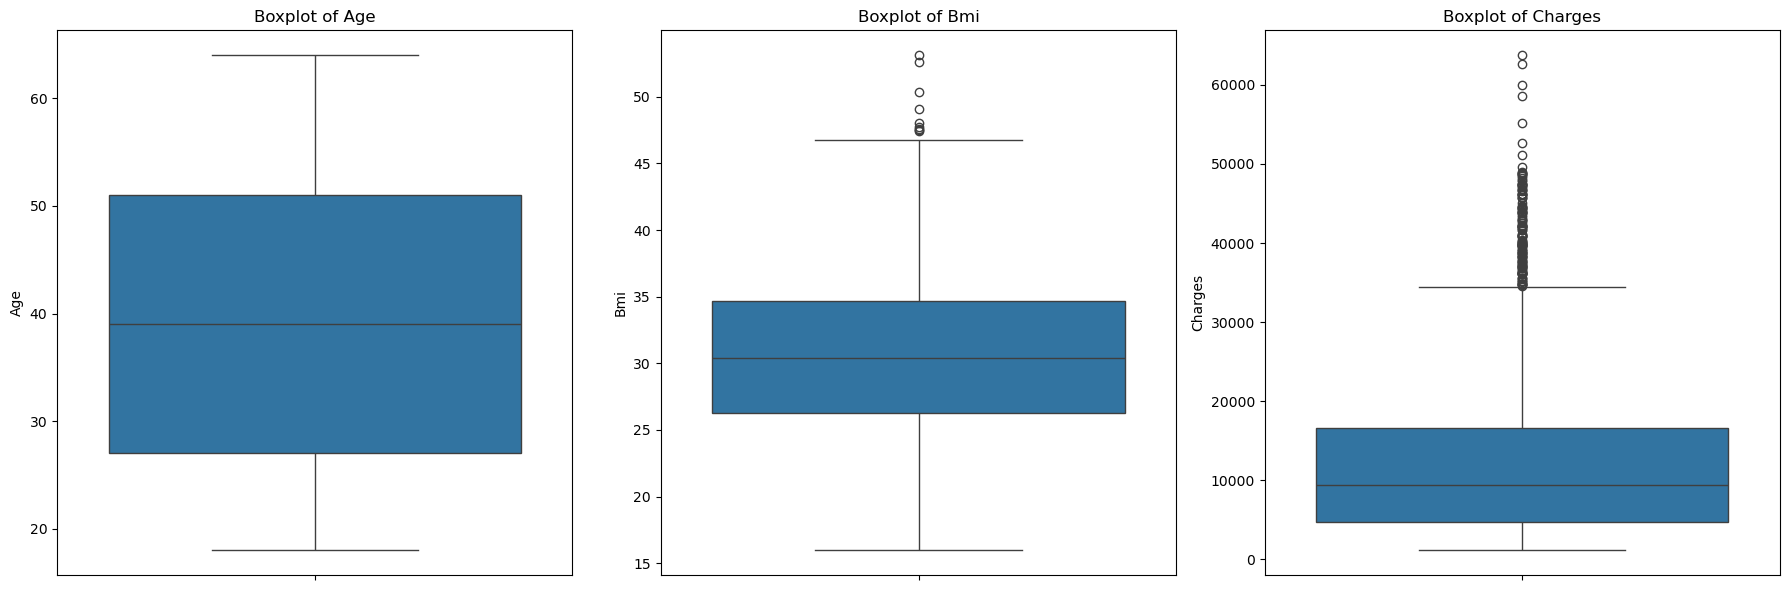

In [6]:
columns_to_plot = ['age', 'bmi', 'charges']
plt.figure(figsize=(18, 6))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(1, 3, i)  
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col.capitalize()}')
    plt.ylabel(col.capitalize())
plt.tight_layout()
plt.show()

### Balance

Here the original data has been plotted. No type of scaling has been applied to any of these graphs, this is just the raw format. This is to give the reader a view of the original plotted data. There are graphs which represent non-Boolean values and others representing the Boolean values. Graphs with Boolean values only have two possible outcomes (True or False, or in our case $0$ or $1$). In comparison to the non-Boolean values which have multiple outcomes, allowing certain trends and patterns to be spotted. Further down, a red density curve has been used on BMI as this follows closely to a normal distribution.

#### Age

Here is a representation of every age between $18$ to $64$. The age distribution is relatively evenly distributed, except for that at the age of $18$ and $19$. Here we can see there is a big spike in the data, meaning a lot of people in that age bracket have completed the survey. This could be due to the survey being advertised in an area where lots of young people were present. This could be bad as it may later skew the data. We may improve the accuracy of our models by removing data from $18$ and $19$ year olds all together, however this would mean sacrificing a large chunk of our already small dataset.

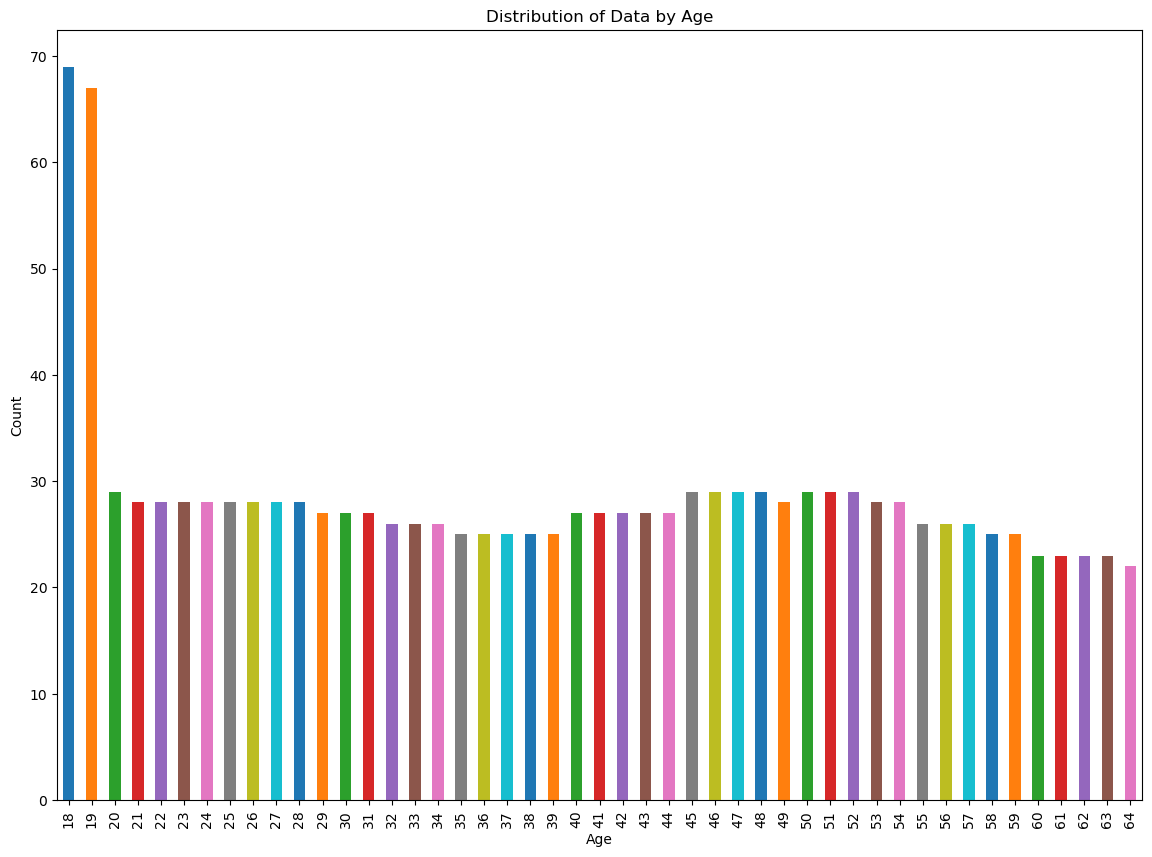

In [7]:
df_age = df_clean.copy(deep=True)
age_counts = df_age['age'].value_counts().sort_index()
age_range = range(18, 64)
no_participants = [age for age in age_range if age not in age_counts.index]
plt.figure(figsize=(14, 10))
age_counts.plot.bar(color=plt.cm.tab10.colors)
plt.title('Distribution of Data by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

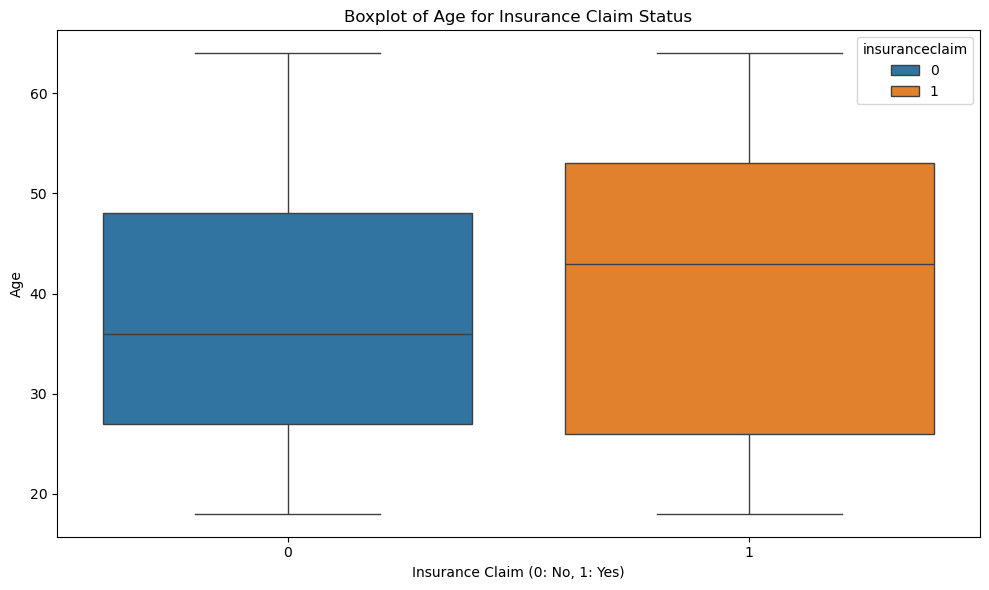

In [8]:
df_clean4=df_clean.copy(deep=True)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean4, x='insuranceclaim', y='age', hue='insuranceclaim', dodge=False)
plt.title('Boxplot of Age for Insurance Claim Status')
plt.xlabel('Insurance Claim (0: No, 1: Yes)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

#### Sex

sex
1    675
0    662
Name: count, dtype: int64


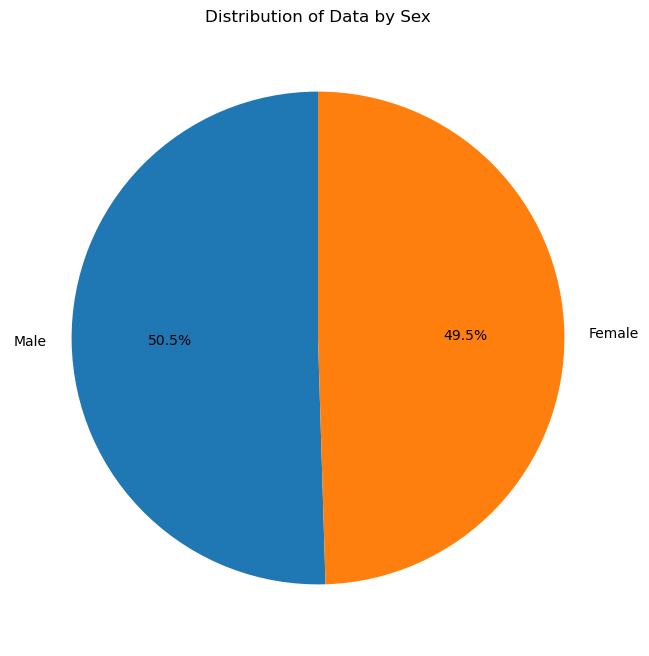

In [9]:
df_sex = df_clean.copy(deep=True)
sex_counts = df_sex['sex'].value_counts()
print(sex_counts)
labels = ["Male","Female"]
plt.figure(figsize=(8, 8))
sex_counts.plot.pie(autopct='%1.1f%%', startangle=90, labels=labels, colors=plt.cm.tab10.colors)
plt.title('Distribution of Data by Sex')
plt.ylabel('')  
plt.show()

We have a very even split between male and female participants as seen on the pie chart. The reason there are only two colours here is because these are Boolean values, meaning there are only two possible outcomes.

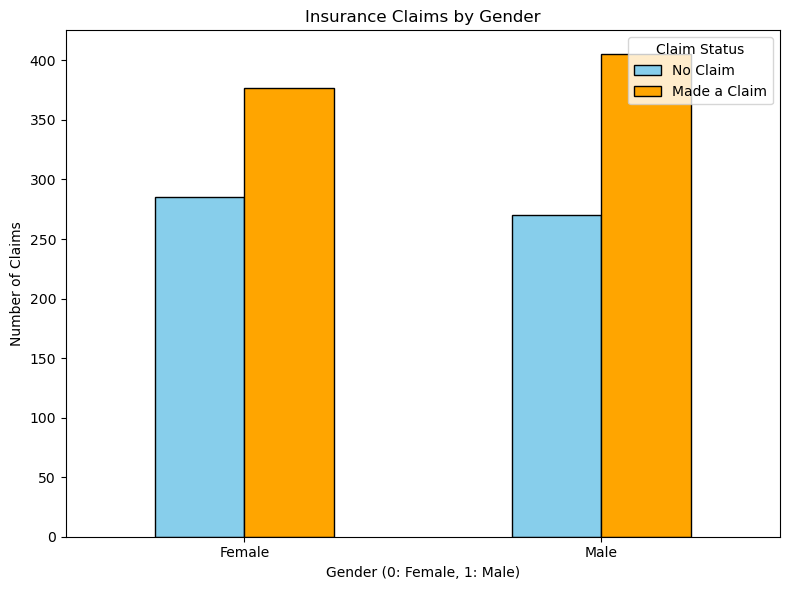

In [10]:
df_clean3=df_clean.copy(deep=True)
claims_by_sex = df_clean3.groupby(['sex', 'insuranceclaim']).size().unstack()
claims_by_sex.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'orange'], edgecolor='black')
plt.title('Insurance Claims by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Number of Claims')
plt.legend(['No Claim', 'Made a Claim'], title='Claim Status', loc='upper right')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
plt.tight_layout()
plt.show()

Male and female have a similar split of 'No Claim' and 'Made a Claim'. Both sexes have more 'Made a Claim' than not. This suggests more people than not in the entire dataset made a claim. Being more specific, males have a higher percentage increase from 'No Claim' to 'Made a Claim' compared to females. This could be due to males being more reckless with their health and not caring as much about what they eat for example.

#### BMI

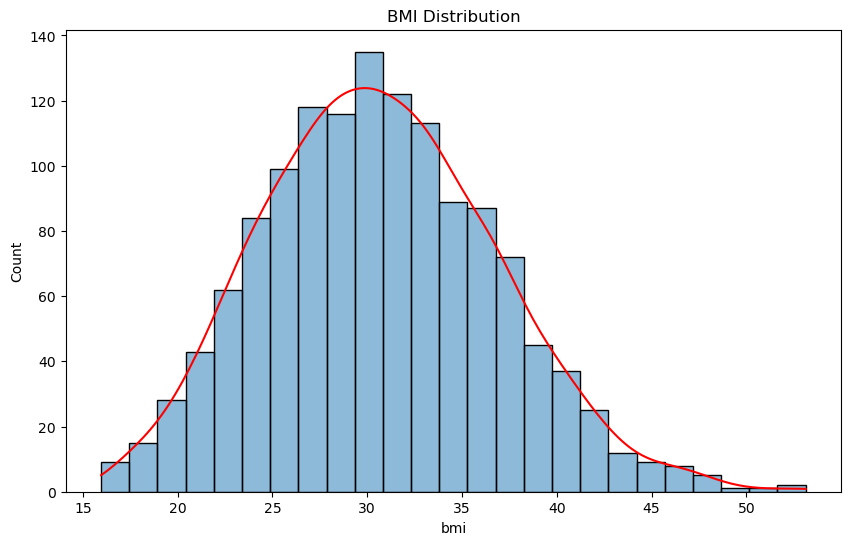

In [11]:
df_clean6 = df_clean.copy(deep=True)
plt.figure(figsize=(10, 6))
sns.histplot(df_clean6['bmi'], kde=True).set(title="BMI Distribution")
plt.gca().get_lines()[0].set_color('red')
plt.show()

A red density curve has been used on BMI as this follows closely to a normal distribution. Here we can see the data is relatively evenly spread around the mean. This graph tells us that most people have a BMI of approximately 30. Anything over 45 could be regarded as an obese BMI.

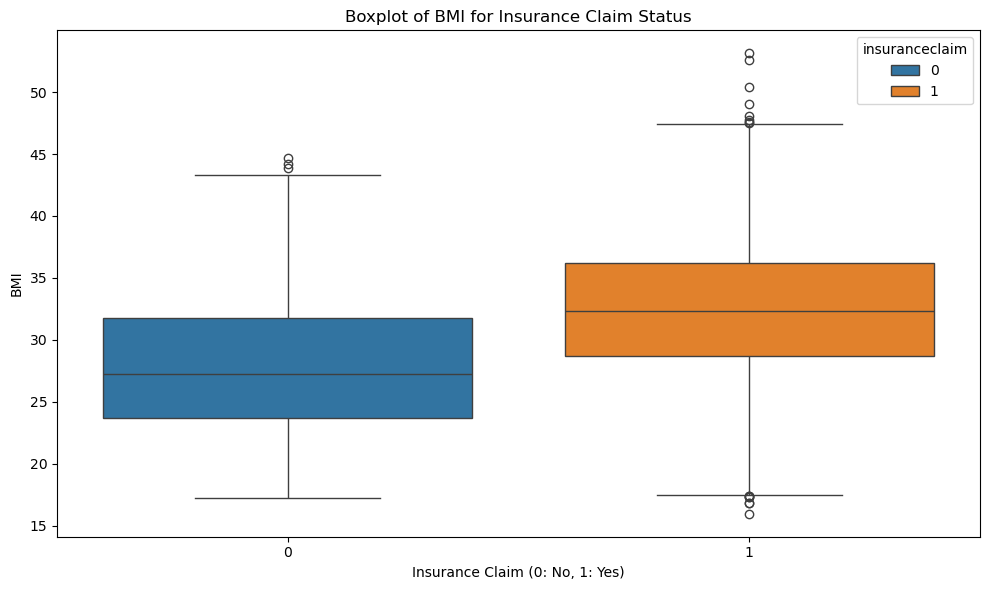

In [12]:
df_clean5=df_clean.copy(deep=True)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean5, x='insuranceclaim', y='bmi', hue='insuranceclaim', dodge=False)
plt.title('Boxplot of BMI for Insurance Claim Status')
plt.xlabel('Insurance Claim (0: No, 1: Yes)')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

Here it is visible that the people who claimed have more outliers than the people with no claims. The median for both also varies. Those who previously made an insurance claim have a higher median BMI. This could be due to the higher BMI suggesting that the individual is less healthy. And of course, those who are less healthy are more likely to make an insurance claim, as mentioned previously. The extreme values at either end of the orange box plot, also known as the outliers, could be due to too much food consumed or too little food consumed by the individual. At the bottom of the orange box plot's whisker there are multiple outliers. This could be due to individuals not eating enough food, making them ill and having to claim on health costs. The reason these are outliers is because, as mentioned previously, they are outside of the $1.5 \times \text{IQR}$.

#### Children

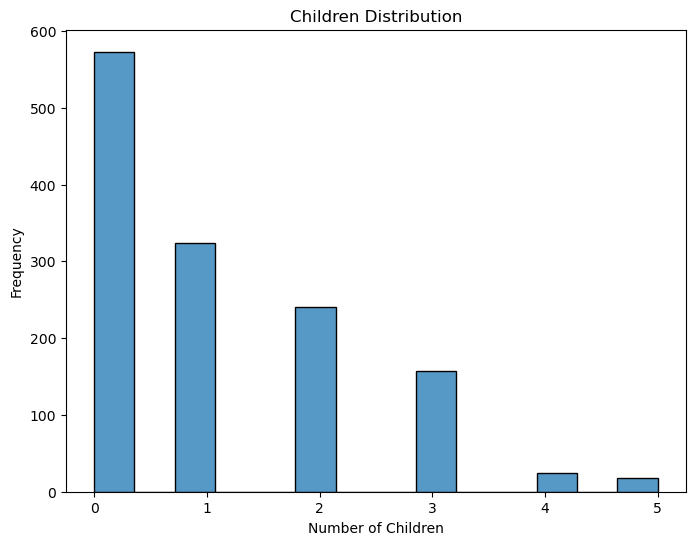

In [13]:
df_clean7=df_clean.copy(deep=True)
plt.figure(figsize=(8, 6)) 
sns.histplot(df_clean7['children'], kde=False).set(title="Children Distribution")  
plt.xlabel("Number of Children")
plt.ylabel("Frequency")
plt.show()

The graph which represents number of children tells us that more people have less children and less people have more children. This is interesting for us but also not very good as it means that we have less people to sample from for those who have exactly $4$ or $5$ children. This may lead to gaps in our data further on and cause our algorithms to have unexpected outcomes. If we can link it back to this as to why it may be behaving weirdly, then that is ok.

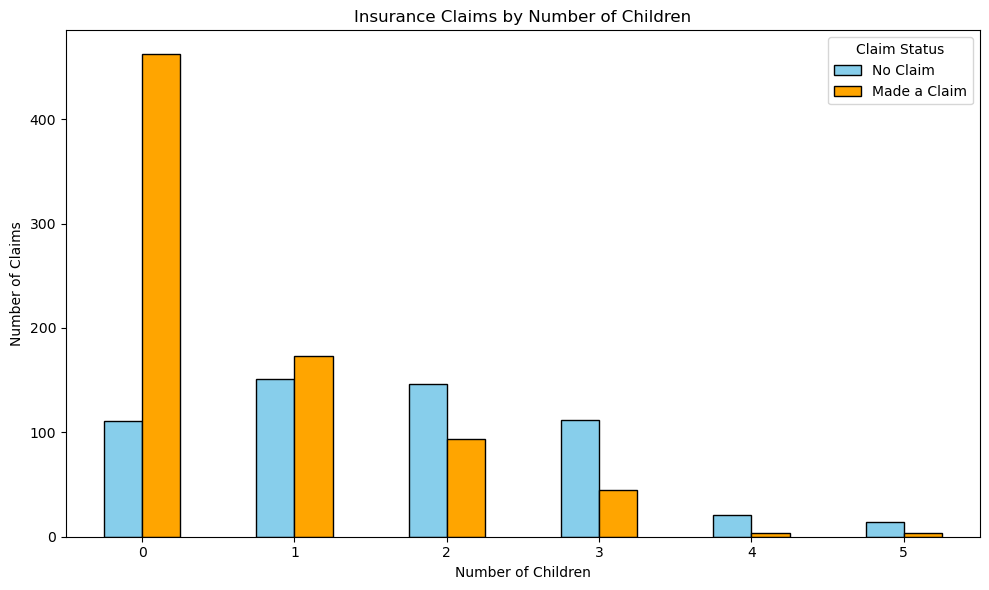

In [14]:
claims_by_children = df_clean7.groupby(['children', 'insuranceclaim']).size().unstack()
claims_by_children.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'], edgecolor='black')
plt.title('Insurance Claims by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Number of Claims')
plt.legend(['No Claim', 'Made a Claim'], title='Claim Status', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

For this graph, people with no children are significantly more likely to make a claim than not. This could be due to them having less self-respect due to not having to care for any child. On the other hand, those with children are less likely to make a claim. This could be due to parents being more careful when they have children. This could include improved diet for both parent and child, as well as the parent not smoking so that it does not affect their child's health. Factors like these will therefore cause their insurance claims to reduce drastically, due to a healthier lifestyle.

#### Smoker

smoker
0    1063
1     274
Name: count, dtype: int64


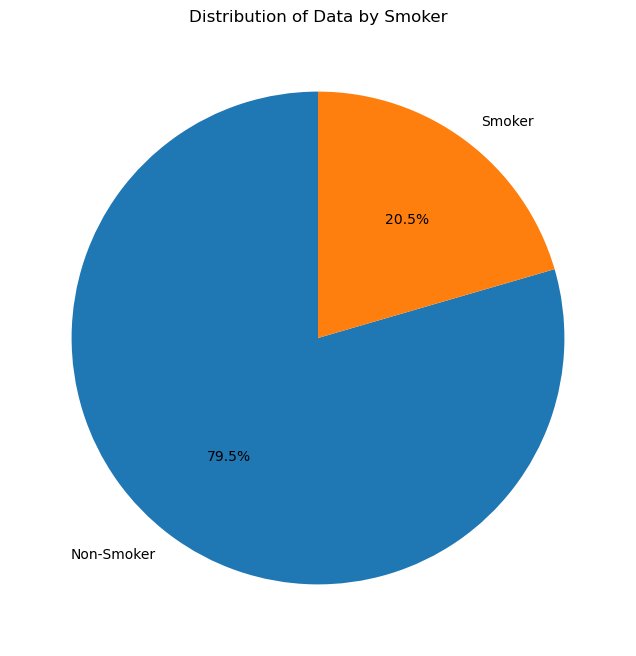

In [15]:
df_clean8=df_clean.copy(deep=True)
df_clean8 = df_clean.copy(deep=True)
smoker_counts = df_clean8['smoker'].value_counts()
print(smoker_counts)
labels = ["Non-Smoker","Smoker"]
plt.figure(figsize=(8, 8))
smoker_counts.plot.pie(autopct='%1.1f%%', startangle=90, labels=labels, colors=plt.cm.tab10.colors)
plt.title('Distribution of Data by Smoker')
plt.ylabel('')  
plt.show()

By looking at this pie chart, there are far more non-smokers than smokers. This is also a Boolean value. 

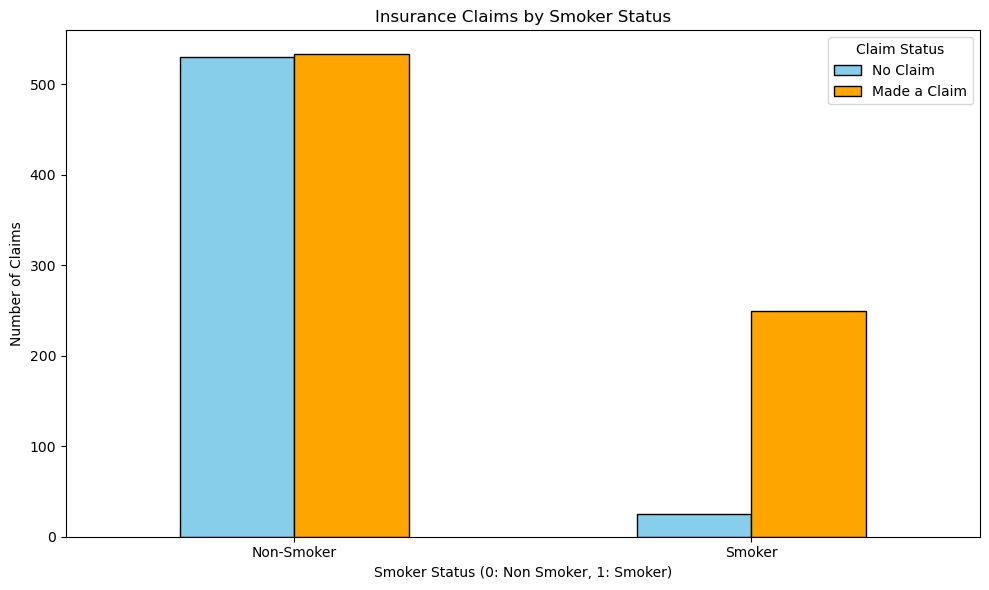

In [16]:
claims_by_smoker = df_clean8.groupby(['smoker', 'insuranceclaim']).size().unstack()
claims_by_smoker.plot(kind='bar',figsize=(10, 6),color=['skyblue', 'orange'],edgecolor='black')
plt.title('Insurance Claims by Smoker Status')
plt.xlabel('Smoker Status (0: Non Smoker, 1: Smoker)')
plt.ylabel('Number of Claims')
plt.legend(['No Claim', 'Made a Claim'], title='Claim Status', loc='upper right')
plt.xticks(ticks=[0, 1], labels=['Non-Smoker', 'Smoker'], rotation=0)
plt.tight_layout()
plt.show()

After splitting the smokers and non-smokers into who have and haven't made a claim, it is clear that if you are a smoker, you are significantly more likely to make a claim. This is due to smoking being bad for your health and typically causes cardiac problems. With these problems, an individual is far more likely to claim on their insurance due to potential hospital visits.

#### Charges

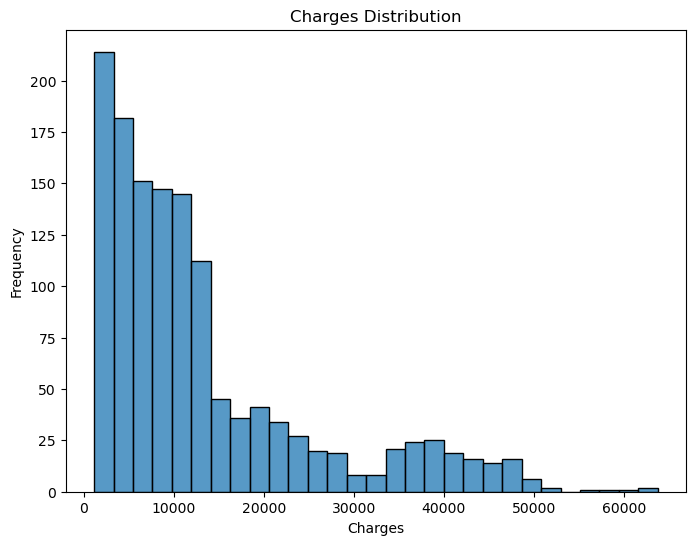

In [17]:
plt.figure(figsize=(8, 6)) 
sns.histplot(df_clean8['charges'], kde=False).set(title="Charges Distribution")  
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

By looking at the charge's distribution, the data is right-skewed. This suggests that most of the people had a lower charge to pay. At approximately $36,000$, there is also a small spike in the frequency, telling us a small proportion of people have higher charges. This could be due to them previously making a number of insurance claims or due to their extremely high BMI.

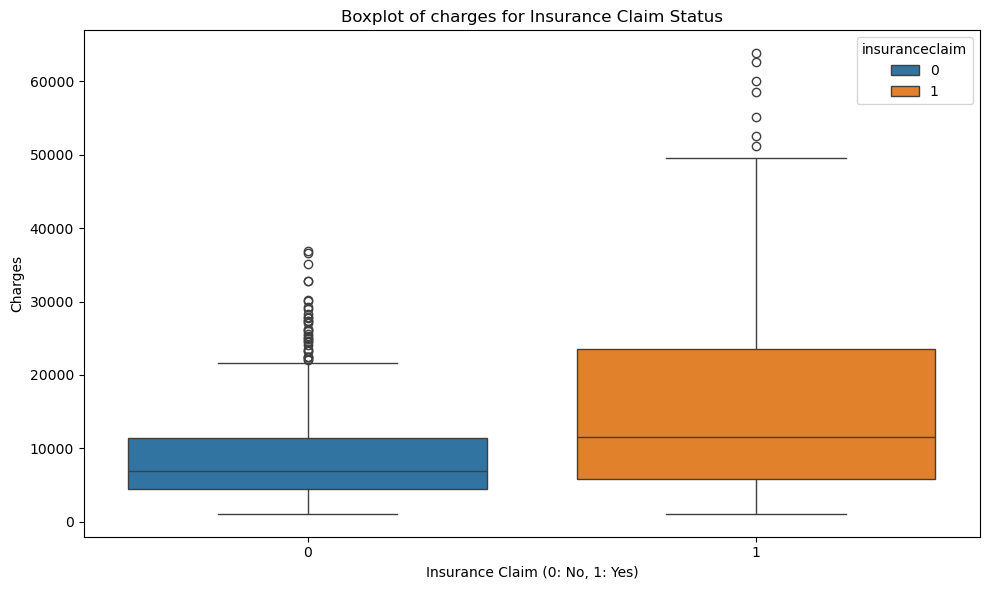

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean8, x='insuranceclaim', y='charges', hue='insuranceclaim', dodge=False)
plt.title('Boxplot of charges for Insurance Claim Status')
plt.xlabel('Insurance Claim (0: No, 1: Yes)')
plt.ylabel('Charges')
plt.tight_layout()
plt.show()

This proves that an individual who has previously made an insurance claim will have higher charges to pay. The median in both plots is different. Those who previously made a claim have a higher median for charges. This makes sense to us due to their premium increasing as they make more claims. The highest charges are from those who previously made claims, which also makes sense. The box plot for those who did not previously make a claim, has more outliers than for those who did previously make a claim. This could be due to some individuals having an abnormally high charge other than the fact that they made a claim or not. Reasons could include, extremely high BMI, being a smoker or even having no children. Neither plot have outliers at the lower end of their whiskers. This is because no one is getting an extremely low charge for their insurance premium. There will be a set price so that the insurance company still makes money. 

#### Region

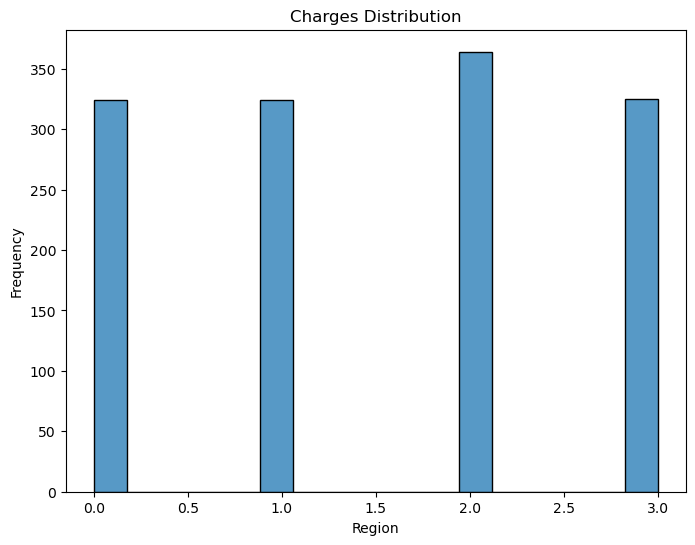

In [19]:
plt.figure(figsize=(8, 6)) 
sns.histplot(df_clean8['region'], kde=False).set(title="Charges Distribution")  
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.show()

For the region distribution, there is a relatively even distribution across all four regions.

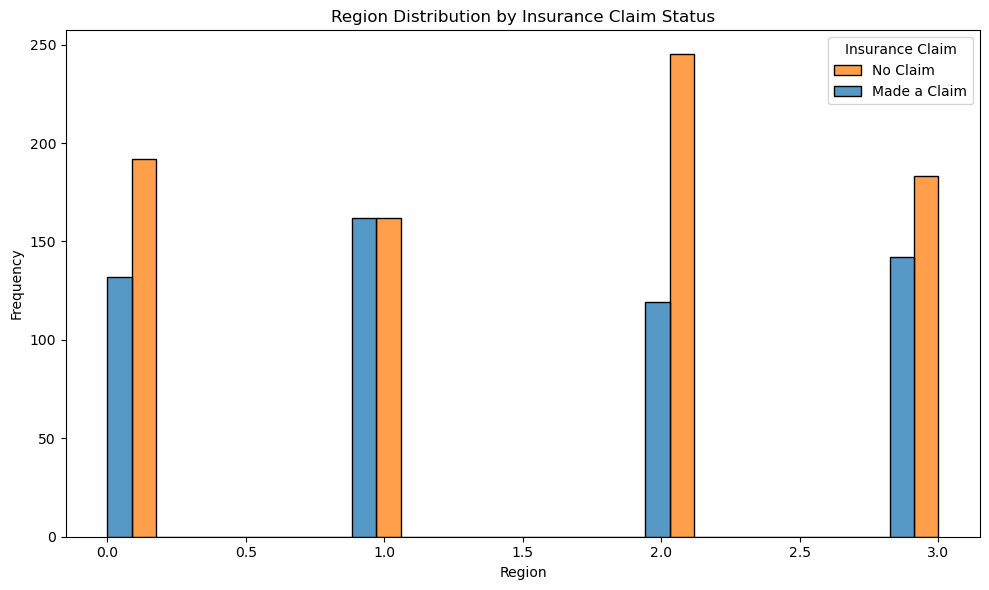

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_clean8, x='region', hue='insuranceclaim', multiple='dodge', kde=False).set(title="Region Distribution by Insurance Claim Status")
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.legend(title='Insurance Claim', labels=['No Claim', 'Made a Claim'])
plt.tight_layout()
plt.show()

Within these regions, the data has now been split into those who made a claim and those who did not make a claim. Most regions were more likely to make a claim than not. But the region that is on the value $1.0$ has an exact $50/50$ split. Meaning there were a lot less claims in this region than others. This could be due to it being a less deprived area, meaning there was potentially better access to medicines and healthy food compared to poorer areas. 

#### Insurance Claim

insuranceclaim
1    782
0    555
Name: count, dtype: int64


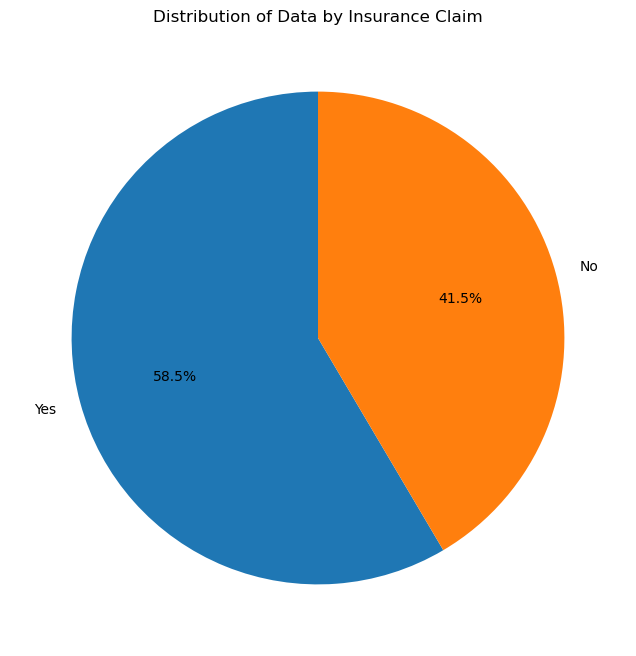

In [21]:
df_clean8 = df_clean.copy(deep=True)
ins_counts = df_clean8['insuranceclaim'].value_counts()
print(ins_counts)
labels = ["Yes","No"]
plt.figure(figsize=(8, 8))
ins_counts.plot.pie(autopct='%1.1f%%', startangle=90, labels=labels, colors=plt.cm.tab10.colors)
plt.title('Distribution of Data by Insurance Claim')
plt.ylabel('')  
plt.show()

By looking at the pie chart, there are more people in the entire dataset who made a claim than not. This is not a surprise from looking at all the previous data. Again this is also a Boolean value.

We initially used data scaling in our project for our algorithms, but then later decided to remove it. We decided this because data scaling was only going to be used on logistical regression, which turned out to not be a suitable model due to the high multicollinearity (as explained below) of age and BMI. Also, most of our features were categorical and not numerical which was also not suitable for logistical regression. Data scaling however was still used for principal component analysis and correlation analysis.

### Variance Inflation Factor (VIF)

Here I have checked to see if the features have a high multicollinearity. High multicollinearity is not good. If it is in the range $1\leq \text{VIF} \leq 5$, then it is acceptable and you know your feature is good to analyse since it doesn't have too high of a correlation between each feature. The closer the VIF is to 1, the better. As you can see below, charges, region, and children all have a relatively low VIF. But BMI and age however are significantly high, with $\text{VIF}>5$. This is not good and proves that we have high multicollinearity.

I have created a plot below, to allow the reader to easily visualise this.

Variance Inflation Factor (VIF) for Each Feature:
    Feature       VIF
0       age  8.115267
1       bmi  9.774586
2  children  1.802508
3    region  2.930459
4   charges  2.479973


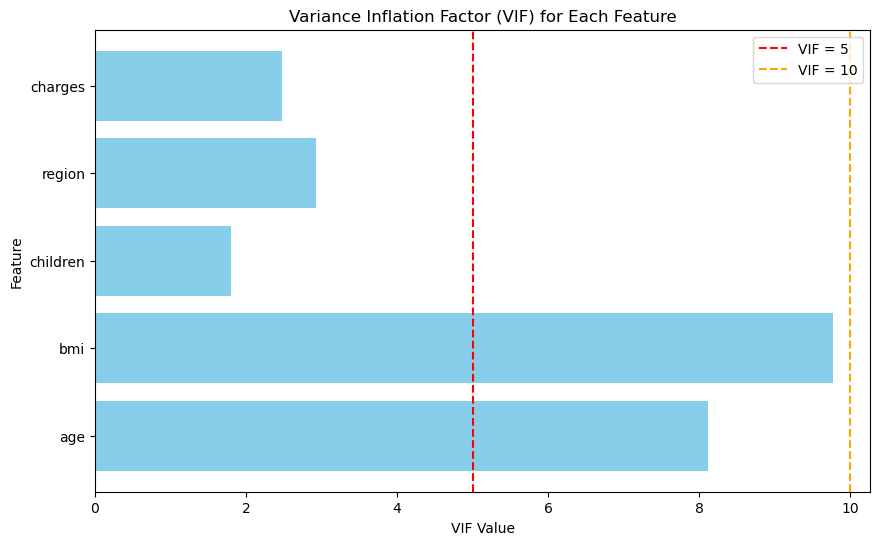

In [22]:
df_clean1=df_clean.copy(deep=True)
df_clean1 = df_clean1.drop(columns=['sex', 'smoker', 'insuranceclaim'])
vif_data = pd.DataFrame()
vif_data['Feature'] = df_clean1.columns
vif_data['VIF'] = [variance_inflation_factor(df_clean1.values, i) for i in range(df_clean1.shape[1])]
print("Variance Inflation Factor (VIF) for Each Feature:")
print(vif_data)
plt.figure(figsize=(10, 6))
plt.barh(vif_data['Feature'], vif_data['VIF'], color='skyblue')
plt.xlabel('VIF Value')
plt.ylabel('Feature')
plt.title('Variance Inflation Factor (VIF) for Each Feature')
plt.axvline(x=5, color='red', linestyle='--', label='VIF = 5')
plt.axvline(x=10, color='orange', linestyle='--', label='VIF = 10')
plt.legend()
plt.show()

## Principle Component Analysis (PCA)

PCA changes high dimensionality data sets into lower dimensionality data sets. It takes the information with the highest importance and ignores any less significant/important information. This helps improve the performance of the machine learning techniques.

The standard scaler was used here for this PCA plot. This is the only scaler we used throughout this project as we found it to be the most reliable and effective with PCA. We did try it with the Yeo-Johnson transformation, min max scaler and lastly the Robust scaler. But overall, the standard scaler performed the best.

The standard scaler sets the mean to $0$ and standard deviation to $1$. By doing this it means all the new scaled values will be centred around zero.

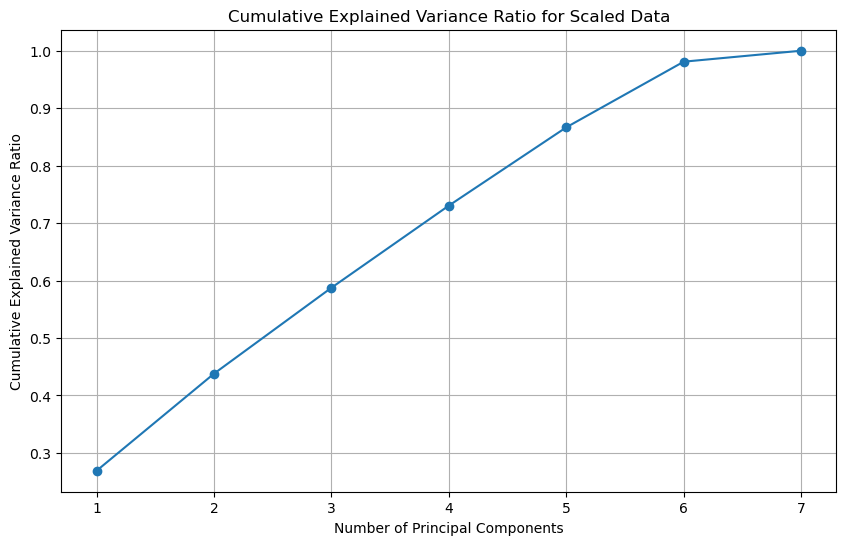

PCA Feature Contributions for Scaled Data:
          Total Feature Contribution  Cumulative Contribution
age                         0.331138                 0.162469
region                      0.307644                 0.313412
smoker                      0.304079                 0.462605
bmi                         0.299099                 0.609355
sex                         0.290926                 0.752095
children                    0.270634                 0.884879
charges                     0.234635                 1.000000


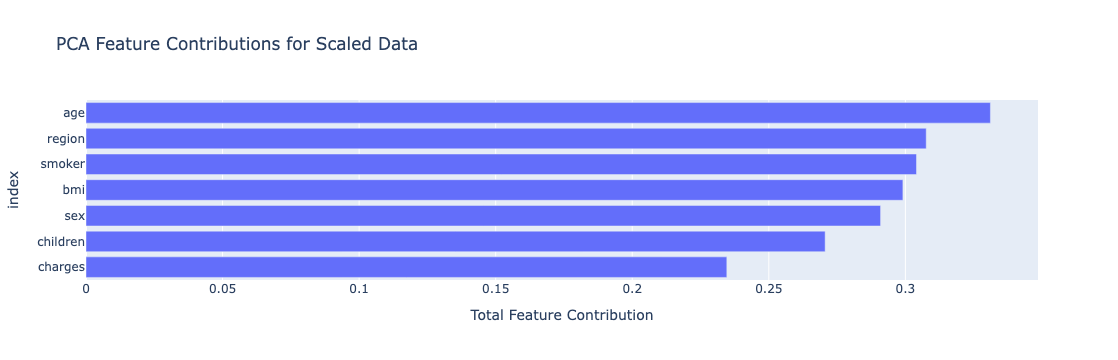

In [23]:
df_clean10=df_clean.copy(deep=True)
if df_clean10['sex'].dtype == 'object':
    df_clean10['sex'] = df_clean10['sex'].map({'male': 0, 'female': 1}).astype(int)
if df_clean10['smoker'].dtype == 'object':
    df_clean10['smoker'] = df_clean10['smoker'].map({'yes': 1, 'no': 0}).astype(int)
if df_clean10['region'].dtype == 'object':
    df_clean10['region'] = pd.Categorical(df_clean10['region']).codes
features = df_clean10.drop(columns=['insuranceclaim'])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
pca = PCA()
components = pca.fit_transform(features_scaled)
variance_ratios = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variance_ratios) + 1), variance_ratios.cumsum(), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Cumulative Explained Variance Ratio for Scaled Data")
plt.grid(True)
plt.show()
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(variance_ratios))], index=features.columns)
loadings = loadings.apply(lambda x: np.abs(x) * variance_ratios, axis=1)
loadings['Total Feature Contribution'] = loadings.sum(axis=1)
loadings = loadings[['Total Feature Contribution']].sort_values(by='Total Feature Contribution', ascending=False)
loadings['Cumulative Contribution'] = loadings['Total Feature Contribution'].cumsum()
loadings['Cumulative Contribution'] /= loadings['Cumulative Contribution'].iloc[-1]  
print("PCA Feature Contributions for Scaled Data:")
print(loadings[['Total Feature Contribution', 'Cumulative Contribution']].to_string())
fig = px.bar(loadings.reset_index(), x='Total Feature Contribution', y='index', orientation='h',
             title='PCA Feature Contributions for Scaled Data')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

From looking at the feature contributions, charges contribute the least to the total feature contribution and age contributes the most. This PCA feature contributions graph tells us that age has the biggest variance contributor to PCA and charges the smallest. The greater the variance, the more we may be able to predict from the feature.
In the PCA table, the cumulative contribution is the cumulative sum of each of the features, starting at the highest feature contributor (age) to the lowest (charges). This cumulative sum is converted to a decimal out of $1$. At charges, the cumulative sum is equal to exactly $1$, as this is the total sum of all features. Furthermore, the total feature contribution refers to the individual contribution for each feature. This however has not been converted to a decimal out of one.
A reason for charges having the lowest total feature contribution, could be due to it being influenced by other features such as age or region.

## Correlation analysis

Correlation analysis is used to identify relationships in the data, allowing us to make predictions. For this no scaling is needed.

On the correlation heat map, red represents a strong positive correlation and blue represents a strong negative correlation. ‘smoker’ with 'charges' has a strong positive correlation. This could be because a smoker has an increased chance of becoming ill due to smoking having a negative impact on their health. This means their insurance premium charges will rise due to smoking posing a higher health risk. This suggests that the strong positive correlation is correct here. 

Since insurance claim is our target feature, we are mainly interested in the 'insuranceclaim' row at the bottom. This way we can compare the target feature with all the other features directly to find the exact correlation.

Furthermore, children and insurance claim have strong negative correlation. As mentioned previously, this could be due to parents being more careful and healthier when they have children. Thus, reducing their number of claims.

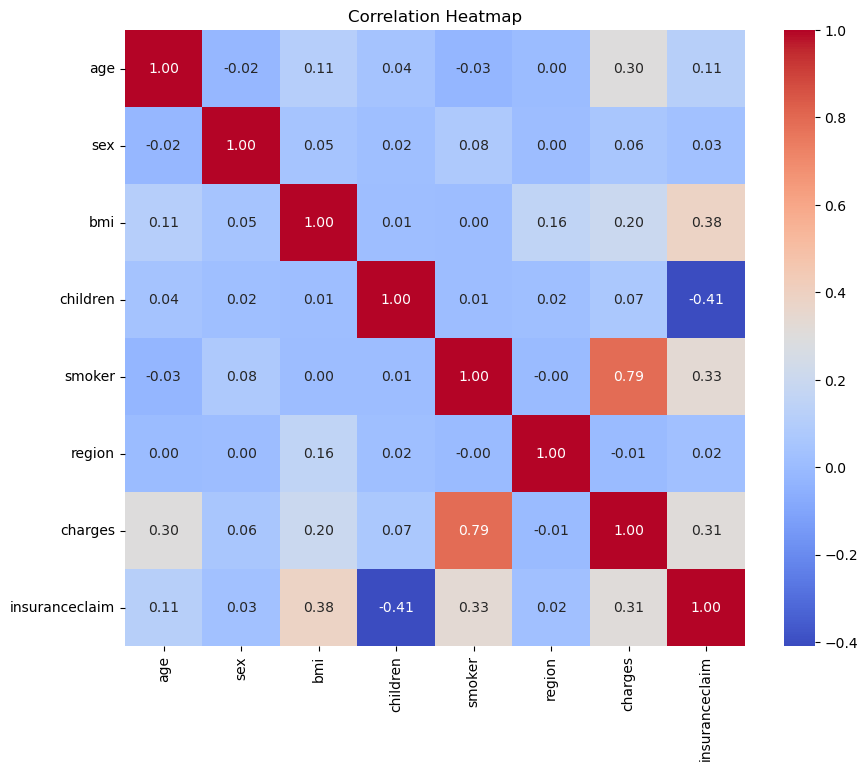

In [24]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_clean10.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

## Conclusion

In conclusion, we have found that there is not much linearity in our log odds graphs. This suggested that logistical regression may not be the most suitable model for this case. Also, our distribution for each individual feature does not follow closely to any distribution, except for BMI which follows closely to a normal distribution. Another point was that the distribution of age was really skewed. There were significantly more people aged 18 and 19 than all other ages, causing an imbalance. This means we will need a robust model. Boxplots have been used to identify any outliers for specific features. This was interesting as charges had the most outliers. It was found in the variance inflation factor that we had high multicollinearity for age and BMI. This also suggests logistical regression would not be a suitable model for this. Lastly for the principal component analysis, age had the largest total feature contribution. Since age also had high multicollinearity, this meant that its large variance was shared amongst other features.

## Set-up for ML Models

### Drop Target Column

In [25]:
x = df_clean.copy(deep=True)
x = x.drop('insuranceclaim',axis=1)
print("Our input variables")
display(x)
y = df_clean['insuranceclaim']
print("Our target variables")
display(y)

Our input variables


age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1337 rows x 7 columns]

Our target variables


0       1
1       1
2       0
3       0
4       1
       ..
1333    0
1334    1
1335    1
1336    0
1337    1
Name: insuranceclaim, Length: 1337, dtype: int64

### Test Train Split

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

## Decision Trees - Isaac

## Decision Tree Parameter Tuning

In this code, I will vary the max_depth and the min_samples_split parameters in the DecisionTreeClassifier function in order to find the most accurate combination of parameters for the decision tree. 

#### Max_depth parameter

The **max depth parameter** in a decision tree controls the maximum number of splits, or "depth," the tree can make from the root node to the farthest leaf node, **limiting how complex the decision tree can become**. 

_Higher max depth_ allows the tree to capture more detailed patterns and interactions within the data. This can lead to a model that fits the training data closely, potentially improving accuracy on the training set but increasing the risk of **overfitting**. Overfitting means the model learns noise or specific quirks in the training data, reducing its ability to generalize to new data.

_Lower max depth_ constrains the tree, resulting in a simpler model that focuses only on the most important splits. While this can help prevent overfitting, it may also cause **underfitting** if the model is too simple to capture key patterns in the data, leading to lower accuracy on both training and test sets.

#### Min_samples_split parameter

The min_samples_split parameter in a decision tree sets the **minimum number of samples required in a node to allow a split to occur**. In other words, a node must have at least this many samples for the algorithm to consider splitting it into child nodes.

_Higher min_samples_split_ values **prevent the tree from splitting too many times on small subsets of data**. This creates a **simpler, more generalized tree** by avoiding splits on nodes with only a few samples, which might capture noise rather than true patterns. As a result, it can help **reduce overfitting** and improve generalization to new data.

_Lower min_samples_split_ values **allow the tree to split nodes with fewer samples**, creating a **more complex, deeper tree**. This may help the model capture more intricate patterns, but it can also **increase the risk of overfitting**, especially if the tree grows too deep and starts to capture noise in the training data.

#### Criterion

The criterion parameter in a decision tree **specifies the function used to measure the quality of splits**. It determines how the decision tree decides where to split the data at each node, based on **minimizing "impurity"** (a measure of how mixed the classes are in a node).

Measures the likelihood of incorrectly classifying a randomly chosen element from a set if it were randomly labeled according to the distribution of labels in the subset. A lower Gini impurity indicates a purer split, with more of the same class in each resulting subset.

**Gini Impurity**:
   $$
   \text{Gini} = 1 - \sum_{i=1}^{C} p_i^2
   $$

#### Code

The following code will create different decision trees with varying values of max_depth and min_samples_split in prder to find the most accurate model in predicting whether someone will make an insurace claim or not. We will account for both accuracy and simplicity of the model. 

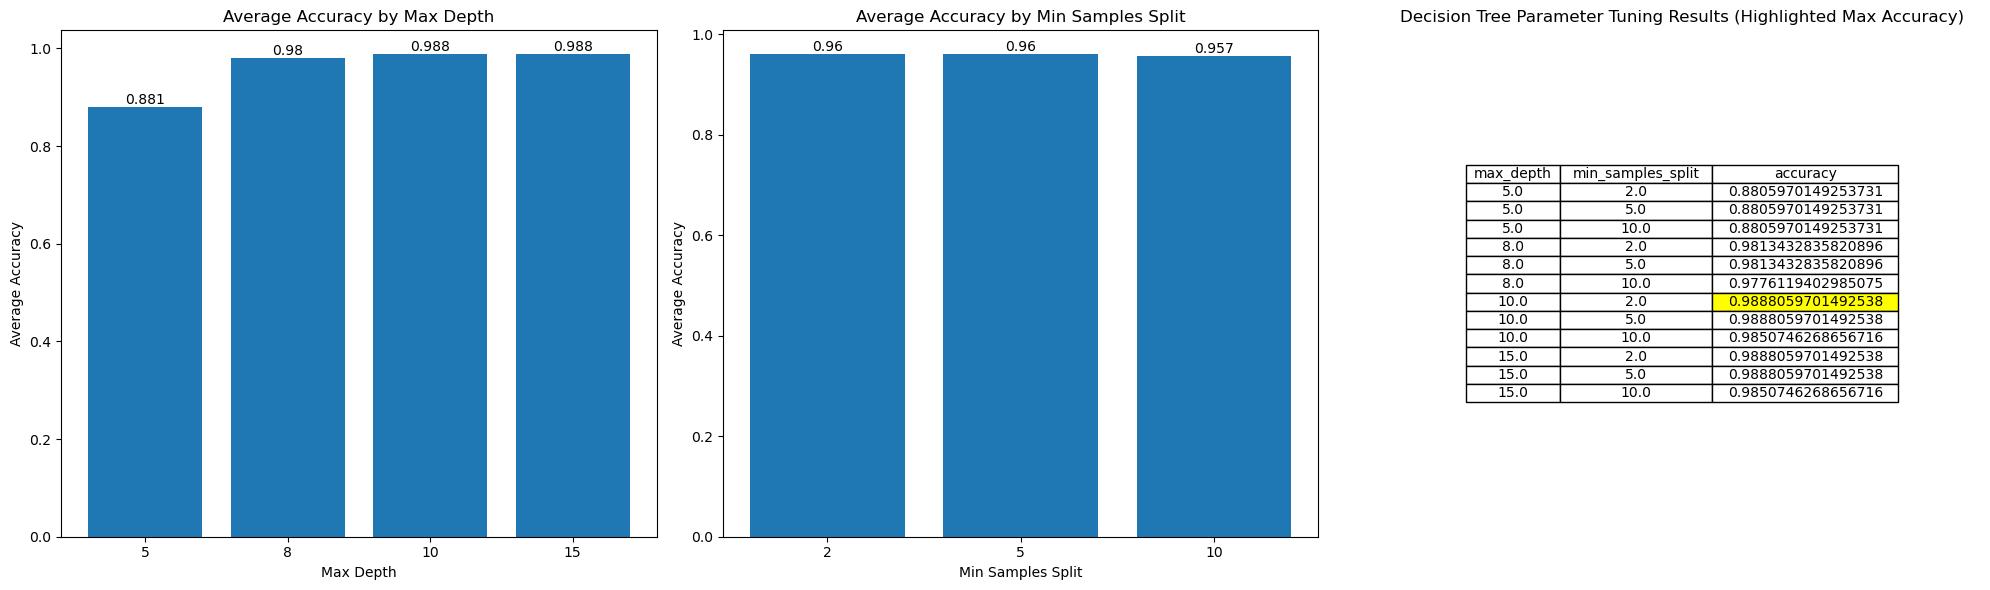

In [27]:
X = df_clean.drop(columns=['insuranceclaim'])
y = df_clean['insuranceclaim']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
results = {"max_depth": [],"min_samples_split": [],"accuracy": []}
max_depth_values = [5, 8, 10, 15]
min_samples_split_values = [2, 5, 10]
for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split,criterion="gini",random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results["max_depth"].append(max_depth)
        results["min_samples_split"].append(min_samples_split)
        results["accuracy"].append(accuracy)
results_df = pd.DataFrame(results)
max_accuracy = results_df['accuracy'].max()
max_index = results_df['accuracy'].idxmax()
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
avg_accuracy_by_depth = results_df.groupby("max_depth")["accuracy"].mean()
bars_depth = axes[0].bar(avg_accuracy_by_depth.index.astype(str), avg_accuracy_by_depth.values)
axes[0].set_xlabel("Max Depth")
axes[0].set_ylabel("Average Accuracy")
axes[0].set_title("Average Accuracy by Max Depth")
for bar in bars_depth:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha="center", va="bottom")
avg_accuracy_by_min_samples = results_df.groupby("min_samples_split")["accuracy"].mean()
bars_min_samples = axes[1].bar(avg_accuracy_by_min_samples.index.astype(str), avg_accuracy_by_min_samples.values)
axes[1].set_xlabel("Min Samples Split")
axes[1].set_ylabel("Average Accuracy")
axes[1].set_title("Average Accuracy by Min Samples Split")
for bar in bars_min_samples:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha="center", va="bottom")
axes[2].axis('off')
table = axes[2].table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
cell = table[(max_index+1, 2)] 
cell.set_facecolor("yellow")
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(results_df.columns))))
axes[2].set_title("Decision Tree Parameter Tuning Results (Highlighted Max Accuracy)")
plt.tight_layout()
plt.show()

#### Results 

As seen in the table and figures above, the average accuracy of the model is only 88.1% for decision trees with a max_depth of 5, however as we increase this to 8, 10 and 15 the average accuracy increases to 98.8% (for max_depth =10). We can then also see that the average accuracy remains the same (95.3%) for all 3 values (2, 5, 10) of the min_samples_split variable. In the table it can be seen that quite a few combinations have the same accuracy as the maximum value (98.88...%). We will explore further before choosing which model to proceed with. 

## Learning Curve Analysis

Learning curve analysis is a technique used to evaluate a model's performance as the amount of training data increases. By plotting learning curves, we can gain insights into how well a model generalizes and identify potential issues like overfitting or underfitting. In a learning curve plot, we typically observe both the training accuracy and validation accuracy across different sizes of the training set.

**Training Accuracy:** This is the model's performance on the training data. As the training set size grows, training accuracy may decrease because the model is exposed to more complex patterns that it needs to learn.

**Validation Accuracy:** This represents the model's performance on unseen data (validation set). Ideally, validation accuracy increases with more training data as the model learns to generalize better.

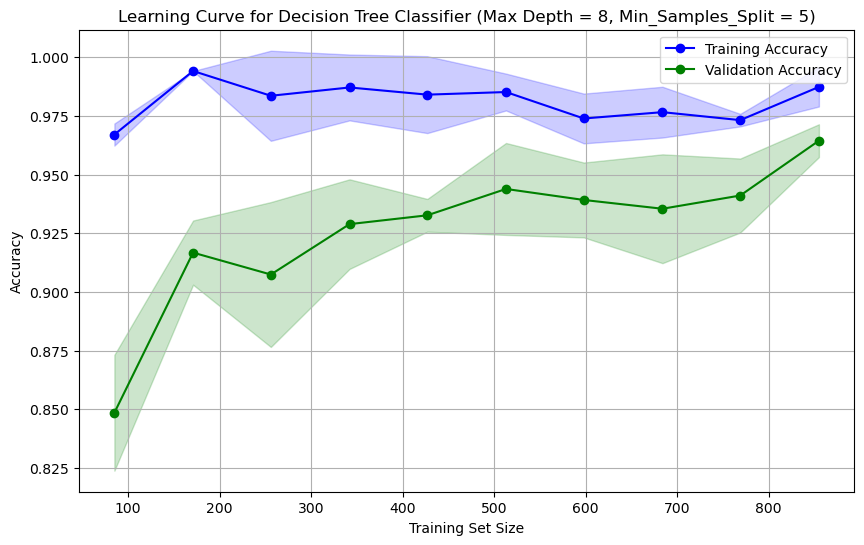

In [28]:
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, validation_scores = learning_curve(
    DecisionTreeClassifier(max_depth=8, min_samples_split=5, random_state=42),
    X_train, y_train,
    train_sizes=train_sizes,
    cv=5,
    scoring="accuracy"
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.plot(train_sizes, validation_mean, label="Validation Accuracy", color="green", marker="o")
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color="green", alpha=0.2)
plt.title("Learning Curve for Decision Tree Classifier (Max Depth = 8, Min_Samples_Split = 5)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

After plotting learning curves for other decision trees, **max_depth=10 and min_samples_split=2** and **max_depth=5 and min_samples_split=10**, it was found that the decision tree with **max_depth=8 and min_samples_split=5** was the best as it balanced accuracy and complexity, whilst also combatting overfitting and remaining interpretable. 

**Results**

**Reduced Training Accuracy:**
The training accuracy is still high but no longer at 100%, indicating that the model is not perfectly memorizing the training data as it was in the more complex tree. This reduction in training accuracy is a good sign because it suggests that the model is less likely to overfit compared to when max_depth was set higher.

**Reduced Gap Between Training and Validation Accuracy:**
The gap between training and validation accuracy has narrowed, compared to the more complex model, which is a positive indicator of better generalization. The model’s performance on unseen data is closer to its performance on the training data, meaning it is less overfitted and better captures patterns that generalize across both sets.

In the less complex tree, the gap was even narrower but accuracy also dropped significantly, so the chosen decision tree is an appropriate middle ground that balances accuracy whilst also trying to avoid overfitting. 

**Stabilized Validation Accuracy:**
The validation accuracy is still increasing with the training set size, though it appears to plateau around 92–93%. This stabilization suggests that the model may be reaching its optimal performance with the given data and configuration.

**Lower Variability in Validation Scores:**
The shaded area around the validation accuracy line (indicating standard deviation) is narrower compared to both other trees, especially as the training size increases. This indicates that the model’s performance is more stable across different cross-validation folds, which is another sign of improved generalization.

**Conclusion:**
By adjusting the max_depth to 8 and increasing min_samples_split to 5, the decision tree model demonstrates a better balance between fitting the training data and generalizing to unseen data. This is a more optimal configuration than the previous ones, as it avoids overfitting while still maintaining strong accuracy.

## Confusion Matrix

The confusion matrix provides a summary of the decision tree model's performance on the test set by showing the counts of correct and incorrect predictions for each class. Here’s a breakdown of each cell in the matrix:

- True Positives (bottom-right) are correctly predicted claims.
- True Negatives (top-left) are correctly predicted non-claims.
- False Positives (top-right) are non-claims predicted as claims.
- False Negatives (bottom-left) are claims predicted as non-claims.

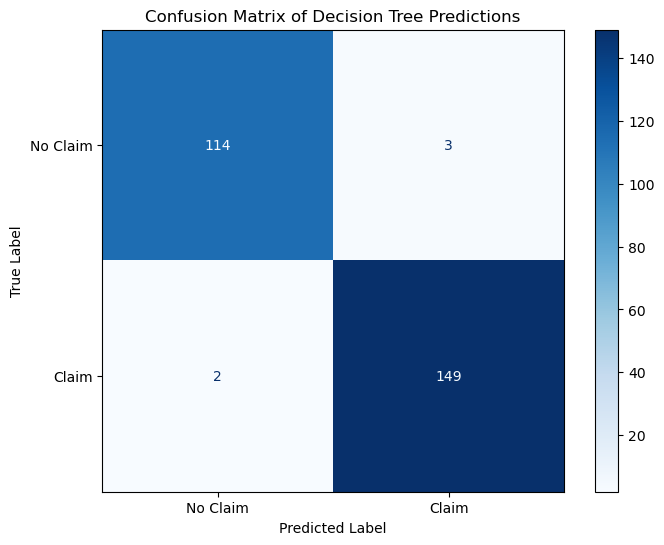

In [29]:
clf_optimal = DecisionTreeClassifier(max_depth=8, min_samples_split=5,criterion="gini",random_state=42)
clf_optimal.fit(X_train, y_train)
y_pred = clf_optimal.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Claim", "Claim"])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap="Blues", ax=ax)
plt.title("Confusion Matrix of Decision Tree Predictions")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### Results

- True Negatives (Top-left): 114 cases were correctly predicted as "No Claim."
- False Positives (Top-right): 3 cases were incorrectly predicted as "Claim" when they were actually "No Claim."
- False Negatives (Bottom-left): 2 cases were incorrectly predicted as "No Claim" when they were actually "Claim."
- True Positives (Bottom-right): 149 cases were correctly predicted as "Claim."

#### Interpretation of results

- High Accuracy: The model accurately predicted most cases, with only a few misclassifications.
- Low False Positives: Only 3 "No Claim" cases were wrongly classified as "Claim," which suggests the model is not excessively over-predicting claims.
- Low False Negatives: With only 2 false negatives, the model is reliable in identifying actual claims, which is important for minimizing missed claim predictions.

Overall, the decision tree model shows a strong performance, effectively distinguishing between claims and non-claims with minimal errors.

## Precision, Recall and F1 Score

In this part of the workbook we will calculate the precision, recall and F1 score of the predictions by the decision tree for each class (claim/no claim).

**Precision**

Precision is the ratio of true positive predictions to the total number of positive predictions (both true positives and false positives).

  $$
  \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
  $$
 
Precision **tells us how accurate the model is when it predicts a positive outcome**. For example, in the context of predicting insurance claims, high precision means that **when the model predicts a claim, it is correct a high proportion of the time**.

**Recall**

Recall (also known as sensitivity or true positive rate) is the **ratio of true positive predictions to the total number of actual positives** (true positives and false negatives).

  $$
  \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
  $$
  
Recall measures the model’s ability to identify all relevant instances. In this case, high recall for claims means the model is capturing most actual claims, with few false negatives.

**F1 Score**

The F1 score is the **mean of precision and recall**, providing a single metric that balances both. It is especially useful when we need a balance between precision and recall.

$$
  \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  $$
  
 The F1 score combines precision and recall into a single metric, which is high only when both precision and recall are high. It’s particularly useful when there is an uneven class distribution or when we need a balance between correctly predicting positive cases and avoiding false positives.

In [30]:
precision_no_claim = precision_score(y_test, y_pred, pos_label=0)
recall_no_claim = recall_score(y_test, y_pred, pos_label=0)
f1_no_claim = f1_score(y_test, y_pred, pos_label=0)
precision_claim = precision_score(y_test, y_pred, pos_label=1)
recall_claim = recall_score(y_test, y_pred, pos_label=1)
f1_claim = f1_score(y_test, y_pred, pos_label=1)
scores_df = pd.DataFrame({
    'Class': ['No Claim', 'Claim'],
    'Precision': [precision_no_claim, precision_claim],
    'Recall': [recall_no_claim, recall_claim],
    'F1 Score': [f1_no_claim, f1_claim]
})
print("Precision, Recall, and F1 Scores for Each Class:")
display(scores_df)

Precision, Recall, and F1 Scores for Each Class:


Class  Precision    Recall  F1 Score
0  No Claim   0.982759  0.974359  0.978541
1     Claim   0.980263  0.986755  0.983498

#### Results

**Precision**

**No Claim:** Precision is 0.98. This means that when the model predicts "No Claim", it is correct 98% of the time. This high precision indicates that there are very few false positives, meaning the model rarely predicts a claim when there isn’t one.

**Claim:** Precision is 0.98. Similarly, the model’s prediction of a "Claim" is accurate 98% of the time. This high precision in the "Claim" class suggests that the model effectively avoids unnecessary claim predictions (false positives).

**Recall**

**No Claim:** Recall is 0.97. This indicates that the model correctly identifies 96% of actual "No Claim" instances. A recall of 0.96 means the model occasionally misses predicting "No Claim" when it should, but this rate is low.

**Claim:** Recall is 0.99. With a recall of 0.99, the model is able to identify 99% of actual claims, with very few false negatives.

**F1 Score**

**No Claim:** F1 Score is 0.98. The F1 score combines precision and recall into a single metric. An F1 score of 0.97 indicates a balanced performance in predicting "No Claim" instances, reflecting both high precision and recall.

**Claim:** F1 Score is 0.98. This high F1 score for claims shows that the model is effective in both identifying actual claims and minimizing incorrect claim predictions. It demonstrates that the model is reliable in distinguishing claims with minimal errors.

**Overall Interpretation**

- High Precision in both classes shows the model rarely makes incorrect predictions, avoiding both unnecessary claim and non-claim predictions.
- High Recall in the "Claim" class ensures the model captures almost all actual claims, which is important for completeness in predictions.
- High F1 Scores in both classes indicate a balanced and reliable performance, with the model excelling in both identifying and correctly predicting claims and non-claims.


## Decision Tree Visualisation

### Full Decision Tree

In the first visualization, we trained a decision tree model using all available features with a maximum depth of 10 and a minimum sample split of 2. This tree captures detailed splits based on the entire feature set, providing insights into how each feature contributes to the classification of insurance claims. Given the depth and number of features, this visualization allows us to see the detailed decision-making process of the tree, although it may be complex and prone to overfitting.

**Purpose:** To understand the decision-making process of a highly detailed tree trained on all features.

**Observations:** With a high maximum depth and minimal restriction on splits, the tree becomes complex, capturing finer details that may not generalize well to new data.

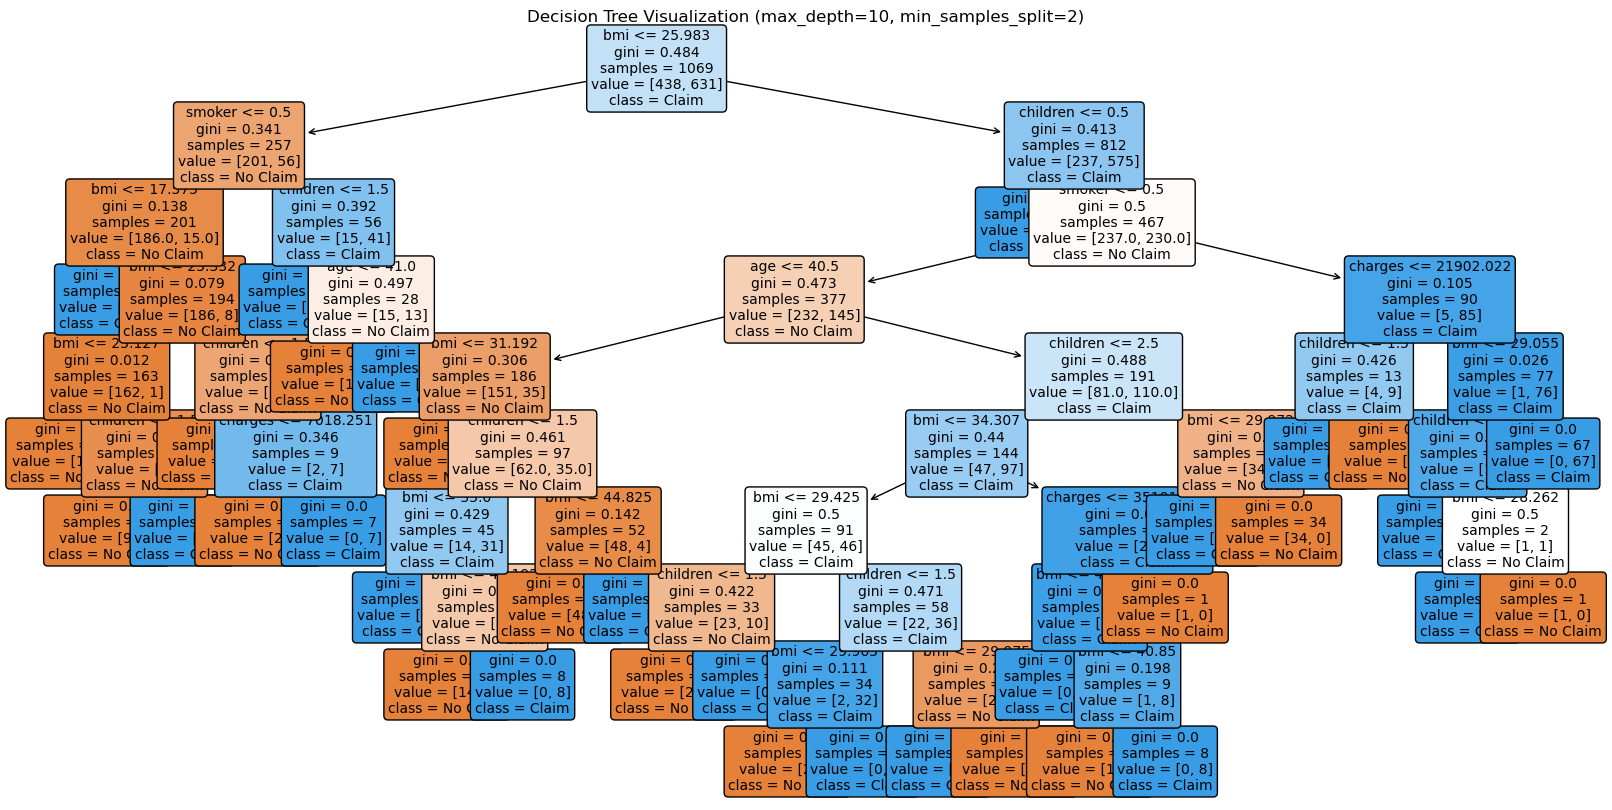

In [31]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_split=2, random_state=42)
clf.fit(X_train, y_train)
feature_names = list(X.columns)
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=["No Claim", "Claim"], rounded=True, fontsize=10)
plt.title("Decision Tree Visualization (max_depth=10, min_samples_split=2)")
plt.show()

### Pruned Decision Tree

In this second visualization, we trained a pruned version of the decision tree with a maximum depth of 8 and a minimum sample split of 5. We did this to investigate whether reducing the complexity of the tree may help it to generalise better and to combat overfitting. We used values we felt were appropriate taking into account the past analysis in this section 

**Purpose:** To prune the tree so that it is more easily visualised, and investigate whether overfitting can be combatted by reducing the complexity of the tree.  

**Observations:** The tree is less complex than the full-depth tree, which may help improve its generalization to unseen data. Reducing the depth and increasing min_samples_split helps prevent the model from fitting minor patterns specific to the training data.

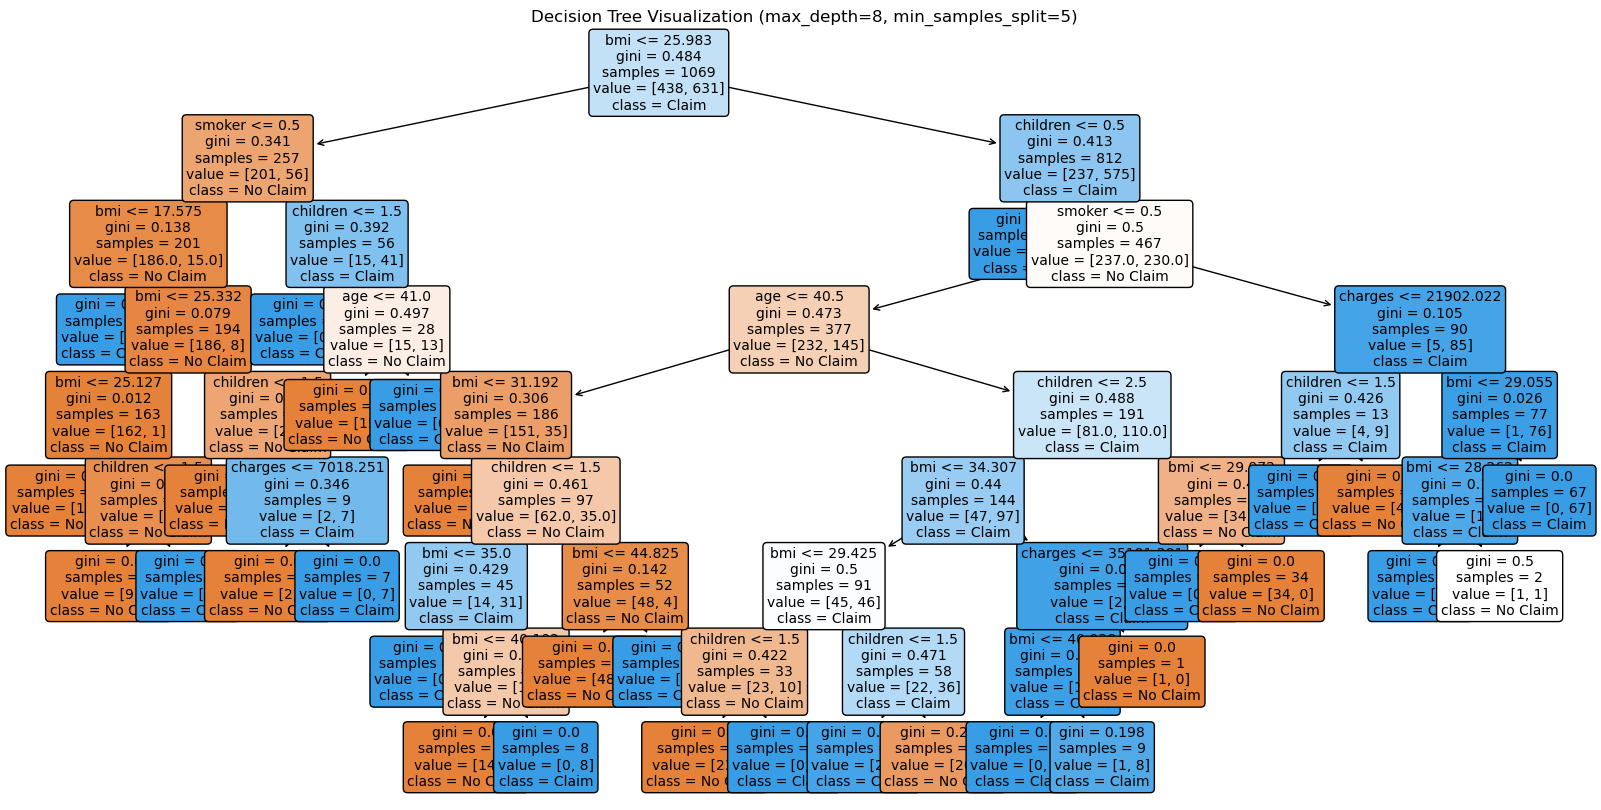

In [32]:
clf = DecisionTreeClassifier(max_depth=8, min_samples_split=5, random_state=42)
clf.fit(X_train, y_train)
feature_names = list(X.columns)
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=["No Claim", "Claim"], rounded=True, fontsize=10)
plt.title("Decision Tree Visualization (max_depth=8, min_samples_split=5)")
plt.show()

### Boolean and Non-Boolean Decision Trees

**Boolean Decision Tree**

In this visualization, we focus on a subset of features containing only boolean variables: sex and smoker. By training a decision tree solely on these binary features, we can observe how much predictive power these features alone provide in classifying insurance claims.

**Purpose:** To isolate and evaluate the contribution of boolean variables in the decision-making process.

**Observations:** The tree is simple, with fewer splits, reflecting the limited number of features. This provides insights into how attributes like smoking status and gender independently contribute to the likelihood of making a claim.

**Non-Boolean Decision Tree**

In the final visualization, we trained a decision tree using only non-boolean (continuous) features, such as age, bmi, charges, and children. By isolating these continuous features, we gain an understanding of how non-binary attributes contribute to the decision-making process and whether they provide a higher level of granularity in predicting insurance claims.

**Purpose:** To assess the impact of continuous variables on the model's predictions independently of binary features.

**Observations:** The tree trained on non-boolean features has more branches and greater depth, indicating that these continuous features provide finer distinctions that allow the model to capture more nuanced patterns in the data.

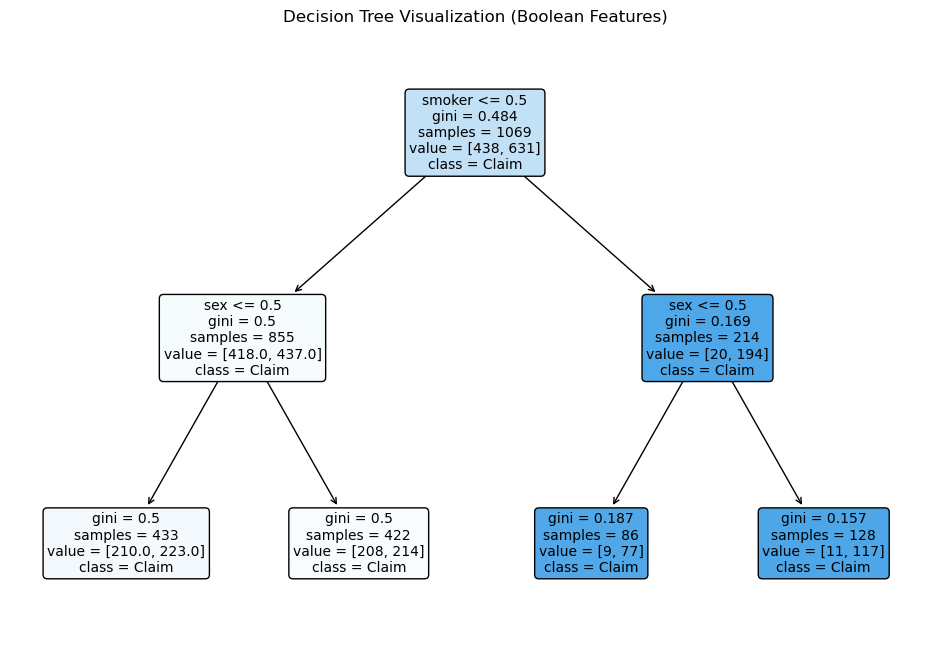

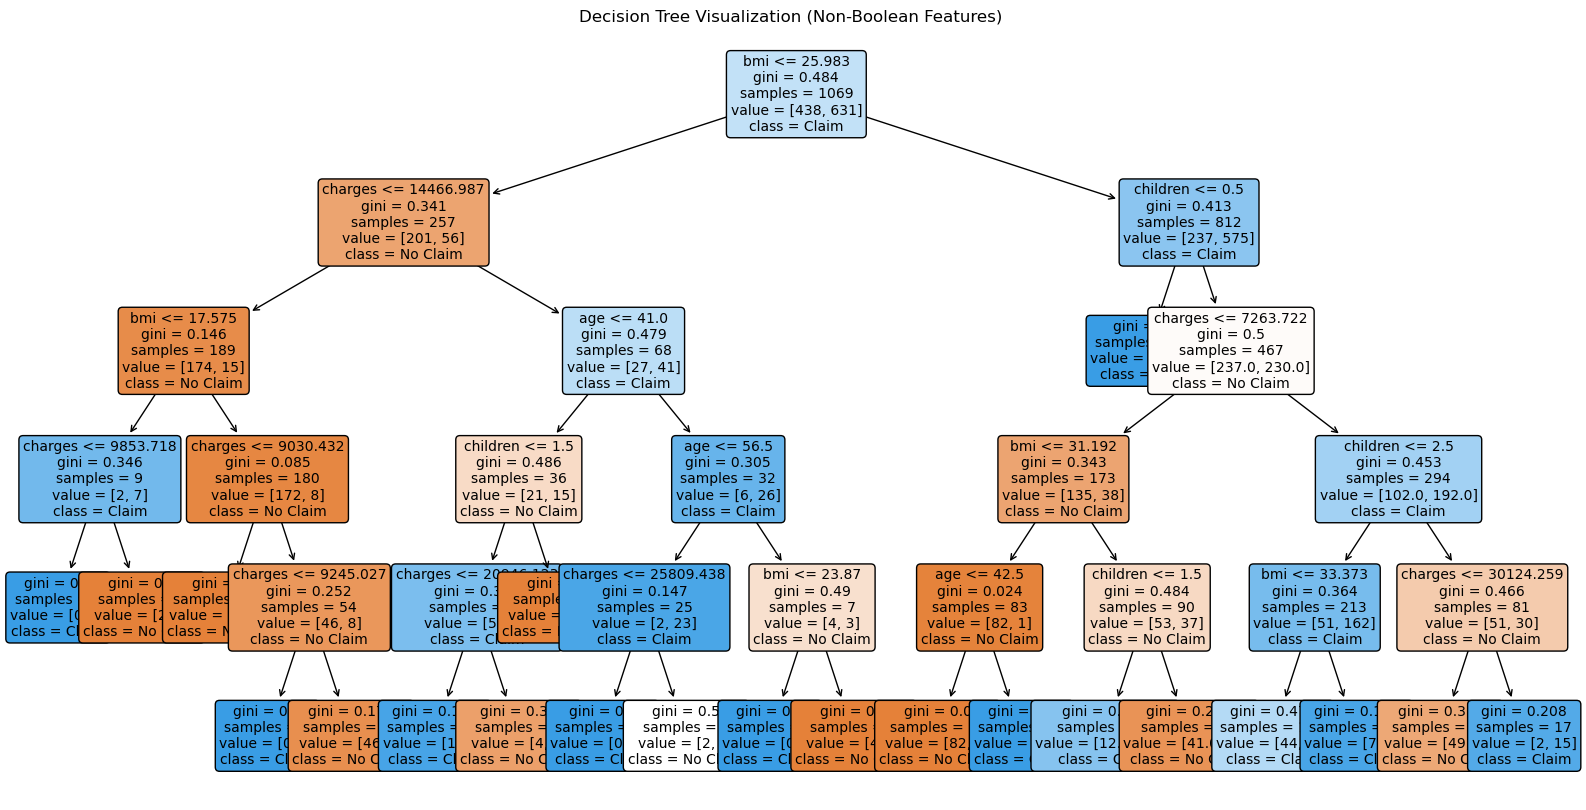

In [33]:
boolean_features = ['sex', 'smoker'] 
non_boolean_features = [col for col in X_train.columns if col not in boolean_features]
X_boolean_train = X_train[boolean_features]
X_non_boolean_train = X_train[non_boolean_features]
clf_boolean = DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=42)
clf_boolean.fit(X_boolean_train, y_train)
clf_non_boolean = DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=42)
clf_non_boolean.fit(X_non_boolean_train, y_train)
plt.figure(figsize=(12, 8))
plot_tree(clf_boolean, filled=True, feature_names=boolean_features, class_names=["No Claim", "Claim"], rounded=True, fontsize=10)
plt.title("Decision Tree Visualization (Boolean Features)")
plt.show()
plt.figure(figsize=(20, 10))
plot_tree(clf_non_boolean, filled=True, feature_names=non_boolean_features, class_names=["No Claim", "Claim"], rounded=True, fontsize=10)
plt.title("Decision Tree Visualization (Non-Boolean Features)")
plt.show()

### Decision Tree Accuracy Scores

In [34]:
clf_full = DecisionTreeClassifier(max_depth=10, min_samples_split=2, random_state=42)
clf_full.fit(X_train, y_train)
accuracy_full = accuracy_score(y_test, clf_full.predict(X_test))
clf_pruned = DecisionTreeClassifier(max_depth=8, min_samples_split=5, random_state=42)
clf_pruned.fit(X_train, y_train)
accuracy_pruned = accuracy_score(y_test, clf_pruned.predict(X_test))
clf_boolean = DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=42)
clf_boolean.fit(X_boolean_train, y_train)
accuracy_boolean = accuracy_score(y_test, clf_boolean.predict(X_test[boolean_features]))
clf_non_boolean = DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=42)
clf_non_boolean.fit(X_non_boolean_train, y_train)
accuracy_non_boolean = accuracy_score(y_test, clf_non_boolean.predict(X_test[non_boolean_features]))
accuracy_df = pd.DataFrame({
    'Model Variant': ['Full Tree', 'Pruned Tree', 'Boolean Features Tree', 'Non-Boolean Features Tree'],
    'Accuracy Score': [accuracy_full, accuracy_pruned, accuracy_boolean, accuracy_non_boolean]
})
accuracy_df

Model Variant  Accuracy Score
0                  Full Tree        0.988806
1                Pruned Tree        0.981343
2      Boolean Features Tree        0.563433
3  Non-Boolean Features Tree        0.869403

**Results**

**Full Tree:**
Accuracy Score: **0.9888 (98.88%)**

Description: The full decision tree, with a maximum depth of 10 and a minimum sample split of 2, achieves the highest accuracy on the test set. This high accuracy suggests that the tree captures many specific patterns in the data. However, given the high depth and low minimum sample split, this model is likely overfitting to some degree, capturing noise in the training data as well as the signal.

**Pruned Tree:**
Accuracy Score: **0.9813 (98.13%)**

Description: The pruned tree, with a maximum depth of 8 and a minimum sample split of 5, achieves slightly lower accuracy than the full tree. By limiting the tree's depth and enforcing a larger minimum sample split, this model is less complex and likely generalizes better. While it sacrifices a small amount of accuracy, this pruned tree may perform better on new data compared to the full tree because it is less likely to overfit.

**Boolean Features Tree:**
Accuracy Score: **0.5634 (56.34%)**

Description: The decision tree trained only on boolean features (e.g., sex and smoker) has a significantly lower accuracy score. This lower performance suggests that the boolean features alone do not contain enough information to effectively predict whether an individual will make a claim. The model is likely too simple, missing important continuous feature-based distinctions necessary for accurate classification.

**Non-Boolean Features Tree:**
Accuracy Score: **0.8694 (86.94%)**

Description: The decision tree trained only on non-boolean features (e.g., age, bmi, charges, etc.) performs better than the boolean features tree, with an accuracy of 86.94%. This result indicates that continuous variables contribute more predictive power than the boolean features alone, likely because they capture more nuanced information about the individuals in the dataset.

- The **full tree** has the highest accuracy, but its complexity suggests a risk of $\color{red}{\text{overfitting}}$.
- The **pruned tree** provides a $\color{green}{\text{good balance between complexity and accuracy}}$, making it potentially more robust for generalization.
- The **boolean features tree** performs poorly on its own, indicating that boolean variables alone are not sufficient for accurate prediction.
- The **non-boolean features** tree achieves reasonable accuracy, showing that continuous variables are important predictors of claims.

## K-Fold Cross Validation

K-fold cross-validation is a technique used to assess the performance and generalization ability of machine learning models. 

Unlike train-test split, where the data is divided into a single training set and a single testing set, **k-fold cross-validation divides the dataset into multiple "folds",** allowing the model to be tested on various portions of the data. This provides a more robust evaluation of model performance and helps to reduce the risk of overfitting or underfitting.

In k-fold cross-validation:

The dataset is **divided into k equally sized subsets**, or folds.
The model is **trained on k-1 folds** and tested on the remaining fold.
This process is **repeated k times**, with each fold used exactly once as the test set.

After all k iterations, the model will have been trained and tested on every data point, providing k different performance scores. These scores are then averaged to produce a final metric, which serves as a more reliable indicator of the model's true performance.

**Why Use K-Fold Cross-Validation?**

- **Improved Accuracy:** By training and testing on multiple subsets of the data, we get a more accurate representation of how the model will perform on unseen data.

- **Reduced Overfitting Risk:** Cross-validation helps reduce the risk of overfitting, as the model is evaluated on multiple test sets rather than a single one.

- **More Robust Model Comparison:** K-fold cross-validation is especially useful when comparing different models, as it provides a consistent and fair evaluation of each model.

In [35]:
chosen_tree = DecisionTreeClassifier(max_depth=8, min_samples_split=5, random_state=42)
k_folds = 5
scores = cross_val_score(chosen_tree, X_train, y_train, cv=k_folds, scoring='accuracy')
results_df = pd.DataFrame({
    'Fold': [f'Fold {i+1}' for i in range(k_folds)],
    'Accuracy Score': scores
})
results_df.loc['Mean'] = ['Mean', scores.mean()]
results_df.loc['Std Dev'] = ['Standard Deviation', scores.std()]
print(results_df.to_string(index=False))

              Fold  Accuracy Score
            Fold 1        0.967290
            Fold 2        0.957944
            Fold 3        0.976636
            Fold 4        0.957944
            Fold 5        0.962441
              Mean        0.964451
Standard Deviation        0.007003


### Comparison of Accuracy Results

In this analysis, we calculated the accuracy of our decision tree model using two different approaches:

**Single Train-Test Split Accuracy:**

This method involved splitting the data once into a training set and a test set, training the model on the training data, and then evaluating it on the test data.
**Result:** The accuracy score obtained using this approach was **98.13%**.

**K-Fold Cross-Validation Accuracy:**

In k-fold cross-validation, the data is divided into five folds (k=5), with the model trained on four folds and tested on the remaining fold, rotating through all folds. This process provides a more robust estimate of the model’s accuracy as it is evaluated on multiple test sets.

**Result:** The average accuracy score across the 5 folds was 96.4%.

**Analysis of the Difference**

**Higher Accuracy with Single Train-Test Split:** The single train-test split gave a higher accuracy of 98.13%. This may suggest that the model is slightly overfitted to this particular split, performing well on that specific test set but potentially less reliably on unseen data.

**Lower but More Reliable K-Fold Accuracy:** The k-fold cross-validation score of 96.4% is slightly lower but likely represents a more accurate assessment of the model’s generalization ability. By testing on multiple folds, we mitigate the potential bias of a single train-test split, providing a more balanced view of the model's performance.

**Conclusion:** While the single train-test split score suggests the model performs well, the k-fold cross-validation score (96.4%) is a more reliable indicator of how the model is expected to perform on truly unseen data. The slight difference between the two scores underscores the value of k-fold cross-validation in providing a robust, realistic performance estimate by reducing dependence on any one specific data split.

# XGBoost Model

## Introduction to XGBoost and Why It Suits the Dataset

XGBoost (Extreme Gradient Boosting) is an optimised gradient-boosting algorithm designed for performance and efficiency. It is widely used for supervised learning problems, especially classification and regression tasks, and is known for its speed and accuracy.

#### **How XGBoost Works**:
XGBoost is an ensemble learning method that builds decision trees sequentially. Each tree focuses on reducing the errors of the previous trees, and the results are combined to make the final prediction. The key features that make XGBoost efficient include:
1. **Gradient Boosting Framework**: It uses gradient descent to minimise the loss function, optimising the predictive accuracy.
2. **Regularisation**: L1 and L2 regularisation help prevent overfitting by penalising overly complex models.
3. **Tree Pruning**: Instead of growing a tree fully and pruning back, XGBoost uses a "max depth" constraint during construction to keep trees simple and efficient.
4. **Handling Missing Data**: XGBoost can natively handle missing values by learning optimal splits based on available data.
5. **Parallel Processing**: It supports parallel computation, making it faster than traditional gradient boosting methods.

#### **Why XGBoost is Well-Suited for This Dataset**:
1. **Mixed Data Types**: This health insurance dataset contains structured data with numerical and categorical features, making XGBoost an excellent choice due to its ability to handle mixed data types effectively.
2. **Binary Classification Task**: XGBoost is optimised for binary classification problems, and its ability to handle imbalanced datasets is valuable if claims are rare.
3. **Small Dataset Size**: With 1200 rows, XGBoost’s efficiency ensures quick training without compromising accuracy.
4. **Feature Relationships**: The interaction between features like age, BMI, smoking status, and charges is non-linear as shown in a previous section. XGBoost captures such non-linearities well.
5. **Regularisation**: Ensures the model does not overfit to this relatively small dataset.
6. **Feature Importance**: XGBoost provides built-in feature importance metrics, allowing us to understand which factors most influence claim likelihood.

#### **Limitations of Using XGBoost for This Dataset**


While XGBoost is a powerful and efficient model, it might not always be the ideal choice for every dataset. Below are some potential limitations of using XGBoost for this specific health insurance dataset:

1. **Small Dataset Size**:
   - XGBoost generally excels with large datasets where its ensemble approach can fully exploit patterns in the data. With only 1200 rows, the model might not perform significantly better than simpler models, such as logistic regression or decision trees, which are less computationally intensive.
   - Overfitting can become a concern with small datasets, as XGBoost's complexity might lead to the model capturing noise instead of generalisable patterns.

2. **Feature Simplicity**:
   - The dataset has only 7 features, and their relationships might not require a highly complex model like XGBoost to capture. Simpler models might achieve similar performance with less computational overhead and better interpretability.

3. **Imbalance in Claims**:
   - If the target column (insurance claim) is highly imbalanced, XGBoost might require additional tuning, such as adjusting class weights or using sampling techniques, to handle the imbalance effectively. Without careful tuning, performance might suffer.

4. **Hyperparameter Sensitivity**:
   - XGBoost requires careful tuning of hyperparameters (e.g., learning rate, tree depth, number of estimators) to achieve optimal performance. With a small dataset, it might be challenging to ensure that validation splits are representative of the test data, increasing the risk of overfitting during the tuning process.

5. **Computational Overhead**:
   - While XGBoost is efficient, its computational cost might not be justified for this small dataset, especially if simpler models provide comparable results. Training and tuning XGBoost might be overkill for this problem size.

#### **Alternative Models**:
   - **Logistic Regression**: Although logistic regression is often considered for binary classification tasks, it assumes a linear relationship between features and the log odds of the target variable. This dataset's non-linear feature interactions make logistic regression an unsuitable option.
   - **Decision Trees** Simpler models like decision trees look very promising for this dataset and are explored in other sections.

#### **Conclusion**:
While XGBoost is a strong choice for many machine learning tasks, its complexity and computational requirements might be excessive for this dataset's size and simplicity. It is essential to benchmark its performance against simpler models to ensure it is the most effective and efficient choice for the task.

#### **Expected Outcome**:
Using XGBoost, we aim to create a robust predictive model that identifies patterns in the feature data to predict whether a person is likely to make an insurance claim. This can help insurers make data-driven decisions, such as optimising pricing strategies or identifying high-risk individuals.


## Performance Metrics

To assess the performance of the XGBoost model, the following metrics are used:

### 1. **Accuracy**
Accuracy measures the proportion of correctly predicted instances (both true positives and true negatives) out of the total number of predictions. It is calculated as:

$$
\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Instances}}
$$

**Why it's useful:** Accuracy provides a simple and overall measure of model performance, especially when the dataset is balanced.

---

### 2. **Precision**
Precision measures the proportion of true positive predictions out of all positive predictions made by the model. It is given by:

$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$$

**Why it's useful:** Precision is important when the cost of false positives is high, as it indicates how reliable the model's positive predictions are.

---

### 3. **Recall (Sensitivity or True Positive Rate)**
Recall measures the proportion of actual positive instances correctly identified by the model. It is calculated as:

$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$

**Why it's useful:** Recall is critical in scenarios where missing positive instances (false negatives) can have severe consequences.

---

### 4. **F1 Score**
The F1 Score is the harmonic mean of Precision and Recall, providing a balanced measure of the two:

$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

**Why it's useful:** The F1 Score is especially useful when there is an imbalance between the classes, balancing the trade-off between Precision and Recall.

---

### 5. **Confusion Matrix**
A confusion matrix provides a detailed breakdown of the model's predictions by displaying the counts of True Positives, True Negatives, False Positives, and False Negatives.

**Why it's useful:** It gives a comprehensive view of the model's performance, helping to identify specific areas where the model struggles.

---

### 6. **ROC-AUC (Receiver Operating Characteristic - Area Under the Curve)**
The ROC-AUC score measures the ability of the model to distinguish between classes by evaluating the trade-off between the True Positive Rate and False Positive Rate across different thresholds.

**Why it's useful:** ROC-AUC is a robust metric for evaluating classifier performance, especially when the dataset is balanced. A higher AUC value indicates better model performance.

---

These metrics collectively provide a well-rounded evaluation of the XGBoost model's performance, ensuring that both overall accuracy and the nuances of class-specific performance are captured.


## Model Set-Up

### Drop Target Column

In [36]:
x = df_clean.copy(deep=True)
x = x.drop('insuranceclaim',axis=1)
print("Our input variables")
display(x)
y = df_clean['insuranceclaim']
print("Our target variables")
display(y)

Our input variables


age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1337 rows x 7 columns]

Our target variables


0       1
1       1
2       0
3       0
4       1
       ..
1333    0
1334    1
1335    1
1336    0
1337    1
Name: insuranceclaim, Length: 1337, dtype: int64

### Test Train Split

Stratified splitting is often considered best practice in binary classification tasks. However, in our case, using a stratified split led to worse performance for both the default and optimised parameter XGBoost models. Consequently, a random split was used in the code below. The following are possible reasons and insights into why stratified splitting might have resulted in poorer performance:

---

#### 1. **Small Dataset Size**:
   - With only 1200 rows, even a stratified split might result in some test folds being less representative of the overall data distribution. This could cause the model to generalise poorly when tested on such splits.
   - Random splits, while not ensuring proportional class distributions, may have unintentionally created splits that were more representative of specific patterns in the dataset.

---

#### 2. **Feature Interactions or Class Dependencies**:
   - If certain features interact differently with the target classes (`No Claim` and `Claim`), stratified splitting might unintentionally bias the splits. While preserving class proportions, it could disrupt key feature-target relationships.
   - For instance, if subpopulations of claims (e.g., smokers with high BMI or low income) are underrepresented in a stratified test set, the model might struggle to generalise to these critical groups.

---

#### 3. **XGBoost's Sensitivity to Distribution Variance**:
   - XGBoost is generally robust to imbalanced datasets but can be sensitive to subtle differences in training and test distributions. Stratified splitting, while balancing class proportions, may have introduced minor inconsistencies in feature distributions between the training and test sets, negatively impacting performance.

---

#### 4. **Overfitting During Stratified Splitting**:
   - Stratified splits can sometimes "lock in" specific feature-target relationships in training or test sets. This is particularly problematic if the test set contains outlier patterns that are not well-represented in the training set. 
   - Random splits may have distributed these patterns more evenly, enabling the model to learn and generalise better.

---

#### 5. **Balanced Target Column**:
   - Since our dataset has a well-balanced target column, the primary advantage of stratified splitting (maintaining proportional class distributions) offers limited additional benefit. Random splits may already approximate the true class distribution, making stratified splitting unnecessary.

---

#### 6. **Data Leakage Concerns**:
   - If stratified splitting inadvertently grouped data based on features correlated with the target (e.g., smokers, BMI, or charges), it may have unintentionally exposed the model to feature-target dependencies during training. This can lead to poor generalisation when tested on a stratified test set with subtle differences in these dependencies.

---

#### **Conclusion**:
While stratified splitting is typically recommended for binary classification tasks, its effectiveness depends heavily on the dataset's size, structure, and feature-target relationships. In this case, random splitting appears to have better represented the dataset's patterns, resulting in superior model performance.

To further validate these observations, stratified cross-validation will be explored later in this section. This approach can provide additional insights into whether the observed issues stem from the specific test set split or the fundamental characteristics of the dataset. Additionally, comparing feature distributions between random and stratified splits could help explain the difference in performance.


In [37]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

## XGBoost Model with Default Parameters

### Default Parameters in XGBoost
XGBoost is a robust and highly flexible machine learning algorithm that comes with a set of predefined default parameters. These parameters govern various aspects of the model, such as tree construction, learning rate, and regularisation. Some of the key default parameters include:
- `learning_rate` (default: 0.3): Controls the step size at each iteration during optimization.
- `max_depth` (default: 6): Defines the maximum depth of each decision tree.
- `n_estimators` (default: 100): The number of boosting rounds.
- `subsample` (default: 1): Determines the fraction of samples used for training each tree.

### Forms a Baseline
Using default parameters provides a strong starting point when developing an XGBoost model. These values are carefully chosen to perform reasonably well on a wide range of problems without requiring initial customisation. By using these defaults:
- **Baseline Performance:** We can establish a baseline for model evaluation, against which adjustments and optimisations can be compared.
- **Ease of Use:** Default parameters simplify the setup process, allowing for rapid prototyping without extensive hyperparameter tuning.

### Why Default Parameters Might Not Be Optimal
While default parameters are convenient, they are not tailored to the specifics of a given dataset or problem. Some limitations include:
1. **Dataset Characteristics:** The default settings may not account for unique characteristics of the dataset, such as size, feature distributions, or class imbalance.
2. **Overfitting or Underfitting:** Parameters like `max_depth` and `learning_rate` need tuning to balance model complexity and generalisation. Defaults may lead to overfitting or underfitting.
3. **Performance Trade-offs:** Optimal settings for hyperparameters like `n_estimators` and `subsample` can significantly improve performance but require experimentation beyond the defaults.

### Conclusion
Default parameters in XGBoost serve as a practical starting point for model development. However, they should not be relied upon for final model optimisation. Adjustments through hyperparameter tuning are often necessary to fully leverage the model's capabilities and achieve optimal performance for the specific task at hand.


## Parameter Optimisation for XGBoost

To optimise the performance of the XGBoost model, we used `RandomizedSearchCV` in the code below to search for the best hyperparameters. Initially, the model encountered overfitting due to the parameter ranges allowing overly complex trees. We refined the parameter ranges to reduced the likelihood of overfitting, which resulted in an improvement in the model's accuracy.

#### **Code Explanation**:

1. **Model Definition**:
   - We defined the `XGBClassifier` with `eval_metric="logloss"` to optimise for log loss, a standard evaluation metric for binary classification tasks.
   - A `random_state` of 42 ensures reproducibility.

2. **Refined Parameter Grid**:
   - The parameter ranges were adjusted after initial runs indicated overfitting. The refined grid included:
     - `n_estimators`: [100, 200, 300, 400, 500] – The number of trees in the ensemble was kept moderate to balance complexity and performance.
     - `learning_rate`: [0.01, 0.05, 0.1, 0.2, 0.3] – A variety of step sizes to allow both slow and fast convergence.
     - `max_depth`: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11] – Broadened to allow shallower trees that generalise better, reducing overfitting.
     - `min_child_weight`: [1, 3, 5, 7, 9, 11, 13] – Higher values were introduced to prevent splits that result in small, overly specific leaf nodes.
     - `gamma`: [0, 1, 2, 3, 4, 5, 6, 7, 8] – Larger values were included to ensure splits occur only when they offer meaningful gains in the objective function.
     - `subsample`: [0.7, 0.8, 0.9] – Restricted to focus on high subsampling to promote generalisation.
     - `colsample_bytree`: [0.5, 0.6, 0.7, 0.8, 0.9, 1.0] – Kept flexible for testing various levels of feature sampling.
     - `reg_alpha`: [0, 1, 5, 10] – L1 regularisation to control model sparsity and penalise overly complex trees.
     - `reg_lambda`: [0, 1, 5, 10] – L2 regularisation to prevent overly large weights in the model.

3. **RandomizedSearchCV Configuration**:
   - `n_iter`: 200 parameter combinations were sampled, balancing thoroughness with computational efficiency.
   - `scoring`: The `roc_auc` metric was used, as it provides a robust evaluation of classification performance.
   - `cv`: 3-fold cross-validation ensured the model was evaluated on multiple data splits for robust performance estimates.
   - `n_jobs`: Set to `-1` to utilise all available CPU cores for faster execution.
   - `random_state`: Ensured reproducibility in parameter sampling.

4. **Search Execution**:
   - The `.fit(xtrain, ytrain)` method was used to train and evaluate the model on all sampled parameter combinations.

5. **Results**:
   - `random_search.best_params_`: Displays the refined set of hyperparameters that maximised the `roc_auc` score.
   - `random_search.best_score_`: Reports the best cross-validation score achieved after refining the parameter ranges.

#### **Advantages of the Refined Approach**:
- The adjusted ranges reduced overfitting by limiting tree depth and increasing regularisation.
- Exploring a narrower but targeted parameter grid improved computational efficiency without sacrificing accuracy.

#### **Disadvantages of RandomizedSearchCV**:
- Not exhaustive: Random search does not test every possible parameter combination, potentially missing optimal configurations.
- Parameter tuning requires manual intervention: Refining the ranges after each run added an iterative step to the process.

#### **Conclusion**:
By refining the parameter grid, we addressed overfitting observed during initial runs and achieved a significant improvement in accuracy. While random search is not exhaustive, its efficiency and flexibility make it a suitable choice for this task, especially with a well-curated parameter grid. The optimised XGBoost model now balances generalisation and predictive accuracy effectively for this dataset.


In [38]:
# Define the XGBoost model with a random state
model = XGBClassifier(eval_metric="logloss",   # Evaluation metric
    random_state=42)         # Set the random state
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  # Step size shrinkage
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],  # Maximum depth of a tree
    'min_child_weight': [1, 3, 5, 7, 9, 11, 13],  # Minimum sum of weights in child nodes
    'gamma': [0, 1, 2, 3, 4, 5, 6, 7, 8],  # Minimum loss reduction for a split
    'subsample': [0.7, 0.8, 0.9],  # Subsampling of data
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],  # Subsampling of features
    'reg_alpha': [0, 1, 5, 10],  # L1 regularisation
    'reg_lambda': [0, 1, 5, 10]}  # L2 regularisation
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=200,                # Number of parameter combinations to try
    scoring='roc_auc',        # Evaluation metric
    cv=3,                     # 3-fold cross-validation
    #verbose=2,                # Display progress
    n_jobs=-1,                # Use all CPU cores
    random_state=42)         # Ensures reproducibility
random_search.fit(xtrain, ytrain)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'subsample': 0.9, 'reg_lambda': 0, 'reg_alpha': 1, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 0.7}
Best Score: 0.9937511142438754


The random search for parameter optimisation identified the following optimal parameters for the XGBoost model:

### **Optimal Parameters**:
1. subsample = 0.9
2. reg_lambda = 0
3. reg_alpha = 1
4. n_estimators = 400
5. min_child_weight = 1
6. max_depth = 5
7. learning_rate = 0.3
8. gamma = 0
9. colsample_bytree = 0.7

---

### **Interpretation of Results**:
The optimal parameters reflect a balance between flexibility and regularisation. Here are the key takeaways:
- The combination of **subsample = 0.9** and **colsample_bytree = 0.7** introduced randomness while retaining most of the dataset and features for training, enhancing generalisation.
- Regularisation through **reg_alpha = 1** helped prevent overfitting, but **reg_lambda = 0** indicates that L2 regularisation was unnecessary for this problem.
- A moderate tree depth (**max_depth = 5**) and a sufficient number of estimators (**n_estimators = 400**) allowed the model to capture complex relationships without becoming overly complex.
- A relatively high **learning_rate = 0.3** ensured faster convergence, making the optimisation process more efficient.


## Performance Analysis

### Comparing Optimised XGBoost Model with Default Parameters

To evaluate the impact of hyperparameter optimisation, we compared the performance of the optimised XGBoost model against the default model using various classification metrics: accuracy, precision, recall, and F1 score. The results showed a noticeable improvement across all metrics for the optimised model. This highlights the importance of parameter tuning in enhancing model performance.


In [39]:
model_optimised = XGBClassifier(eval_metric="logloss",
                                random_state=42,
                               subsample = 0.9,
                                reg_lambda = 0,
                                reg_alpha = 1,
                                n_estimators = 400,
                                min_child_weight = 1,
                                max_depth = 5,
                                learning_rate = 0.3,
                                gamma = 0,
                                colsample_bytree = 0.7)
model_default = XGBClassifier(eval_metric = 'logloss', random_state = 42)
model_optimised.fit(xtrain, ytrain)
model_default.fit(xtrain, ytrain)
ypreds = model_optimised.predict(xtest)
ypreds2 = model_default.predict(xtest)
accuracy = accuracy_score(ytest, ypreds)
precision_no_claim = precision_score(ytest, ypreds, pos_label=0)
recall_no_claim = recall_score(ytest, ypreds, pos_label=0)
f1_no_claim = f1_score(ytest, ypreds, pos_label=0)
precision_claim = precision_score(ytest, ypreds, pos_label=1)
recall_claim = recall_score(ytest, ypreds, pos_label=1)
f1_claim = f1_score(ytest, ypreds, pos_label=1)
scores_df = pd.DataFrame({
    'Class': ['No Claim', 'Claim'],
    'Precision': [precision_no_claim, precision_claim],
    'Recall': [recall_no_claim, recall_claim],
    'F1 Score': [f1_no_claim, f1_claim]})
print("Optimised Parameters")
print("Accuracy Score:", accuracy)
print("Precision, Recall, and F1 Scores for Each Class:")
display(scores_df)
accuracy2 = accuracy_score(ytest, ypreds2)
precision_no_claim2 = precision_score(ytest, ypreds2, pos_label=0)
recall_no_claim2 = recall_score(ytest, ypreds2, pos_label=0)
f1_no_claim2 = f1_score(ytest, ypreds2, pos_label=0)
precision_claim2 = precision_score(ytest, ypreds2, pos_label=1)
recall_claim2 = recall_score(ytest, ypreds2, pos_label=1)
f1_claim2 = f1_score(ytest, ypreds2, pos_label=1)
scores_df2 = pd.DataFrame({
    'Class': ['No Claim', 'Claim'],
    'Precision': [precision_no_claim2, precision_claim2],
    'Recall': [recall_no_claim2, recall_claim2],
    'F1 Score': [f1_no_claim2, f1_claim2]})
print("Default Parameters")
print("Accuracy Score:", accuracy2)
print("Precision, Recall, and F1 Scores for Each Class:")
display(scores_df2)

Optimised Parameters
Accuracy Score: 0.9850746268656716
Precision, Recall, and F1 Scores for Each Class:


Class  Precision    Recall  F1 Score
0  No Claim   1.000000  0.965812  0.982609
1     Claim   0.974194  1.000000  0.986928

Default Parameters
Accuracy Score: 0.9738805970149254
Precision, Recall, and F1 Scores for Each Class:


Class  Precision    Recall  F1 Score
0  No Claim   0.991071  0.948718  0.969432
1     Claim   0.961538  0.993377  0.977199

### Confusion Matrix Analysis for the Optimised XGBoost Model

The confusion matrix below illustrates the performance of the optimised XGBoost model in predicting whether a person made an insurance claim (`Claim`) or not (`No Claim`). Here is a breakdown of its components:

#### **Key Observations**:
1. **True Positives (Bottom-Right, "Claim" Correctly Predicted)**:
   - The model correctly identified **151 instances** of individuals who made a claim.
   - This high count demonstrates the model's strong ability to detect actual claims.

2. **True Negatives (Top-Left, "No Claim" Correctly Predicted)**:
   - The model correctly identified **113 instances** of individuals who did not make a claim.
   - This indicates good performance in identifying non-claim cases.

3. **False Positives (Top-Right, "No Claim" Predicted as "Claim")**:
   - Only **4 instances** of non-claim cases were incorrectly predicted as claims.
   - This low count shows the model's precision is high for the "Claim" class.

4. **False Negatives (Bottom-Left, "Claim" Predicted as "No Claim")**:
   - There are **0 instances** where actual claims were missed by the model.
   - This is an excellent result, showing that recall for the "Claim" class is perfect.

#### **Model Performance Highlights**:
- **High Recall for Claims**: The model successfully identifies all instances of claims without missing any, which is crucial in scenarios where predicting claims is a priority.
- **High Precision for No Claims**: The model maintains strong accuracy in predicting non-claims, with very few false positives.
- **Balanced Performance**: The model demonstrates a good trade-off between precision and recall for both classes, achieving near-perfect classification.

#### **Potential Improvements**:
- While the current performance is excellent, particularly with zero false negatives, reducing the false positives (4 cases) could further refine the model's precision for the "Claim" class.
- Further analysis might reveal whether these false positives share specific patterns that can be addressed with feature engineering or additional tuning.

#### **Conclusion**:
The optimised XGBoost model performs exceptionally well, with a perfect recall for claims and very low error rates overall. This level of performance indicates the model is highly effective for the given dataset and task.


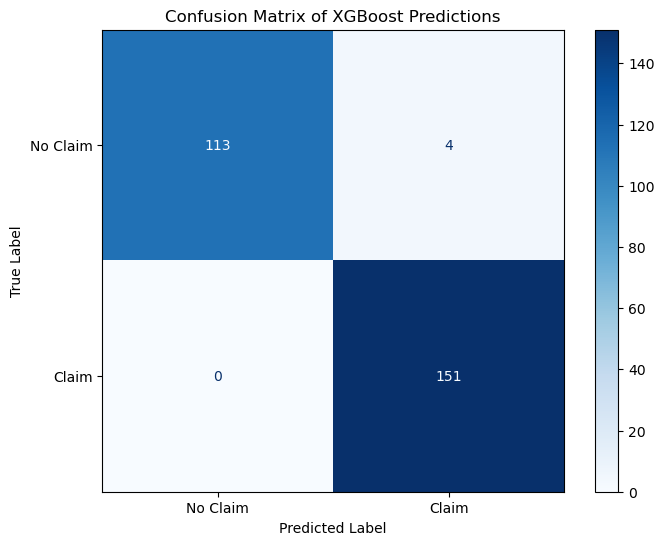

In [40]:
cm = confusion_matrix(ytest, ypreds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Claim", "Claim"])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap="Blues", ax=ax)
plt.title("Confusion Matrix of XGBoost Predictions")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Learning Curve Analysis for XGBoost Classifier with Optimised Parameters

The following code and graph display a learning curve for the optimised XGBoost model. The learning curve provides valuable insights into how the model performs as the training set size increases, revealing trends in generalisation, overfitting, and underfitting.

---

#### **Key Observations**:

1. **Training Accuracy**:
   - The training accuracy begins at **1.0** for small training set sizes, indicating perfect fitting to the limited data. This is a clear sign of overfitting at the initial stages due to insufficient data diversity.
   - As the training set size increases, the training accuracy slightly decreases and stabilises just below **1.0**, indicating that the model becomes less overfitted and focuses more on generalisable patterns.

2. **Validation Accuracy**:
   - The validation accuracy starts relatively low (around **0.85**) when the training set size is small, reflecting challenges in generalising from limited data.
   - With increasing training set sizes, the validation accuracy improves steadily and eventually stabilises near **0.975**, converging toward the training accuracy.
   - The convergence between training and validation accuracy demonstrates that the model is well-tuned, avoiding both overfitting and underfitting.

3. **Confidence Intervals (Shaded Regions)**:
   - The shaded areas around the curves represent the standard deviation of the accuracy scores across cross-validation folds.
   - At smaller training set sizes, the validation accuracy exhibits a wider spread, reflecting higher variability due to limited data for both training and testing.
   - As the training size increases, the confidence intervals narrow, indicating more reliable and consistent model performance as it learns from larger datasets.


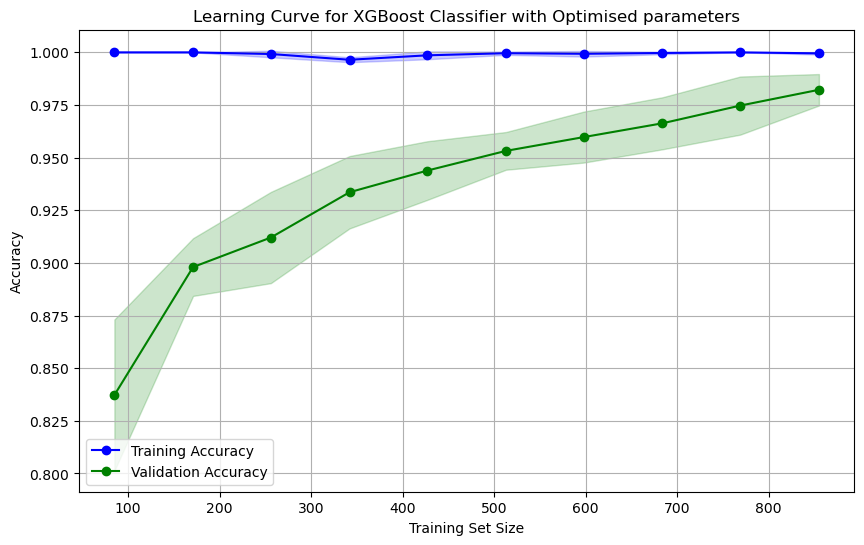

In [41]:
model_lc = XGBClassifier(eval_metric="logloss",
                                random_state=42,
                               subsample = 0.9,
                                reg_lambda = 0,
                                reg_alpha = 1,
                                n_estimators = 400,
                                min_child_weight = 1,
                                max_depth = 5,
                                learning_rate = 0.3,
                                gamma = 0,
                                colsample_bytree = 0.7)
train_sizes, train_scores, test_scores = learning_curve(model_lc, xtrain, ytrain, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Accuracy", color="blue", marker="o")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="blue", alpha=0.2)
plt.plot(train_sizes, test_scores_mean, label="Validation Accuracy", color="green", marker="o")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="green", alpha=0.2)
plt.title("Learning Curve for XGBoost Classifier with Optimised parameters")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

### ROC-AUC curve

The **ROC-AUC** (Receiver Operating Characteristic - Area Under the Curve) is a widely used metric for evaluating the performance of binary classification models. It provides a single value that summarises the model's ability to distinguish between the two classes. This was used in the parameter tuning section to optimise our model.

---

#### **What is the ROC Curve?**
The **ROC curve** is a graphical representation of a model's performance across various classification thresholds. It plots the following metrics:
1. **True Positive Rate (TPR)**: Also known as sensitivity or recall, this is the proportion of actual positives correctly identified:
   \[
   TPR = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
   \]
2. **False Positive Rate (FPR)**: This is the proportion of actual negatives incorrectly classified as positives:
   \[
   FPR = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}}
   \]

The ROC curve shows the trade-off between TPR and FPR at different threshold settings. A perfect classifier would have a curve that passes through the top-left corner of the plot (TPR = 1, FPR = 0).

---

#### **What is the AUC (Area Under the Curve)?**
The **AUC** is the area under the ROC curve, providing a single numerical score to evaluate the model's performance:
- AUC ranges from **0 to 1**:
  - **1.0**: Perfect classifier.
  - **0.5**: Random guessing (no discriminatory power).
  - **< 0.5**: Worse than random guessing (poor model).

---

#### **Why Use ROC-AUC?**
1. **Threshold-Independent**:
   - Unlike metrics like accuracy, ROC-AUC evaluates the model across all possible threshold values, making it less biased by a specific decision boundary.

2. **Balances Class Imbalances**:
   - ROC-AUC is effective in scenarios with imbalanced datasets, as it considers the relative performance for both classes without being skewed by class proportions.

3. **Measures Ranking Ability**:
   - ROC-AUC assesses how well the model ranks positive cases higher than negative ones, which is crucial in many real-world scenarios.

---

#### **Interpreting ROC-AUC for the Optimised Model**
By optimising the model using ROC-AUC, we ensure that:
- The model is tuned to maximise its ability to separate the positive (`Claim`) and negative (`No Claim`) classes.
- It performs well across all possible thresholds, making it robust to different operational requirements or decision thresholds.

In summary, ROC-AUC is a powerful and versatile metric for evaluating classification models, particularly when class distribution is imbalanced or when the goal is to prioritise ranking over specific classification thresholds.


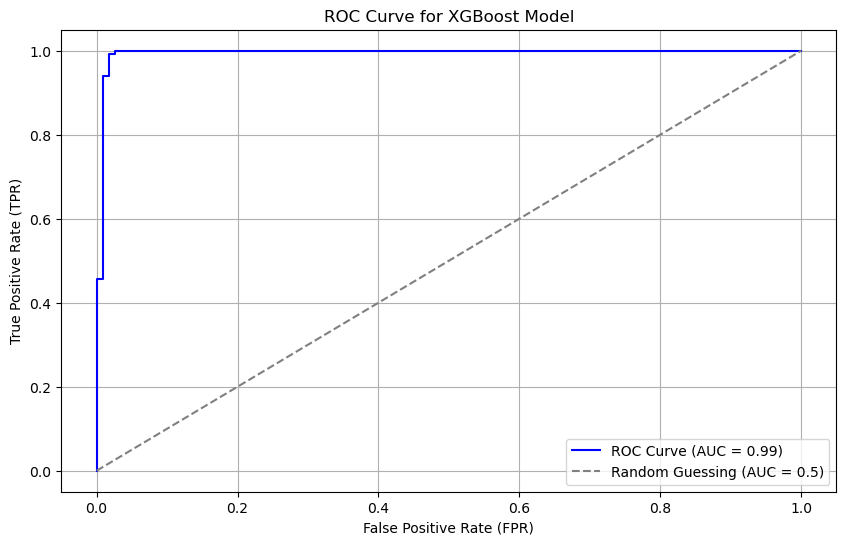

In [42]:
y_probs = model_optimised.predict_proba(xtest)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(ytest, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guessing (AUC = 0.5)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for XGBoost Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()

#### **Analysis**

The above ROC curve evaluates the performance of the optimised XGBoost model in distinguishing between the two classes: `Claim` and `No Claim`. The plot visualises the trade-off between the **True Positive Rate (TPR)** and the **False Positive Rate (FPR)** at various classification thresholds.

---

#### **Key Observations**:

1. **AUC (Area Under the Curve)**:
   - The AUC is **0.99**, which is very close to the maximum possible value of **1.0**.
   - This indicates that the model has an excellent ability to distinguish between the positive (`Claim`) and negative (`No Claim`) classes.
   - An AUC of **0.99** suggests that the model ranks almost all positive instances higher than negative instances with near-perfect accuracy.

2. **ROC Curve Shape**:
   - The ROC curve rises sharply towards the top-left corner, which is indicative of a strong model.
   - The steep rise shows that the model achieves a high **True Positive Rate (TPR)** with a very low **False Positive Rate (FPR)**, especially at lower thresholds.

3. **Diagonal Line (Random Guessing)**:
   - The dotted diagonal line represents a random classifier with an AUC of **0.5**. The ROC curve of the XGBoost model is well above this line, confirming that the model is significantly better than random guessing.

---

#### **What the ROC Curve Shows**:
1. **High TPR and Low FPR**:
   - The model achieves high sensitivity (true positive rate) while keeping the false positives low across most thresholds, which is essential for a classification task where both positive and negative predictions are important.

2. **Threshold Variation**:
   - The ROC curve reflects the model's performance across different decision thresholds. For instance:
     - At lower thresholds, the model predicts more positives (higher TPR) but may also predict more false positives (higher FPR).
     - At higher thresholds, the model becomes more conservative, predicting fewer positives, leading to lower FPR but potentially missing some true positives.

---

#### **Model Implications**:
- The high AUC score (**0.99**) indicates that the XGBoost model is robust and reliable for this dataset.
- The steep rise of the ROC curve highlights the model’s ability to correctly identify `Claim` cases while minimising incorrect predictions of `No Claim` cases as `Claim`.
- This performance aligns with the results observed in the accuracy and stratified K-Fold evaluations, further validating the model's effectiveness.

---

#### **Conclusion**:
The ROC curve and AUC confirm that the optimised XGBoost model is highly effective for this binary classification problem. With near-perfect discrimination between the two classes, this model is well-suited for deployment in scenarios where accurate identification of claims is crucial. Further tuning is unlikely to yield significant improvements, given the current high level of performance.


## Stratified K-Fold

The code and results below showcase the implementation of a stratified K-Fold cross-validation approach. This technique ensures that each fold preserves the percentage of samples for each class, providing a robust evaluation of the model's performance.

---

### **What is Stratified K-Fold Cross-Validation?**
Stratified K-Fold is a variant of K-Fold cross-validation designed to maintain the class distribution across each fold. In standard K-Fold cross-validation:
1. The data is randomly split into `K` subsets (folds).
2. Each fold is used as a test set once, while the remaining `K-1` folds serve as the training set.
3. This process is repeated `K` times, and the model's performance is averaged across the folds.

Stratified K-Fold extends this concept by ensuring that each fold contains approximately the same proportion of each class as the original dataset. This is particularly useful for classification problems, especially when the target variable has an imbalance.

---

### **Key Observations from Results**:

1. **Fold-Specific Accuracy Scores**:
   - The accuracy scores for each fold are consistently high, ranging from **0.943** to **0.985**. This indicates that the model performs reliably across different data splits.
   - The variation between the folds is minimal, highlighting that the stratified splitting does not lead to significant fluctuations in performance due to differences in data distributions.

2. **Mean Accuracy**:
   - The mean accuracy across the 5 folds is **0.971**, demonstrating that the model generalises well to unseen data.
   - This high mean accuracy reinforces the effectiveness of the optimised parameters.

3. **Standard Deviation**:
   - The standard deviation of the accuracy scores is **0.0156**, which is very low. This shows that the model's performance is consistent and stable across different folds, adding to the confidence in the model's robustness.

In [43]:
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model_optimised, xtrain, ytrain, cv=stratified_cv, scoring='accuracy')
results_df = pd.DataFrame({
    'Fold': [f'Fold {i+1}' for i in range(5)],
    'Accuracy Score': scores})
results_df.loc['Mean'] = ['Mean', scores.mean()]
results_df.loc['Std Dev'] = ['Standard Deviation', scores.std()]
print(results_df.to_string(index=False))

              Fold  Accuracy Score
            Fold 1        0.967290
            Fold 2        0.985981
            Fold 3        0.943925
            Fold 4        0.985981
            Fold 5        0.976526
              Mean        0.971941
Standard Deviation        0.015632


## Feature Importance

### Feature Importance Analysis with XGBoost
The `plot_importance` function in XGBoost generates a bar chart ranking the features based on their importance in the model. Feature importance is determined by the F-score, which reflects how often a feature is used in decision splits across all the trees in the ensemble.

#### **Key Observations from the Feature Importance Plot**:
1. **Top Contributors**:
   - `bmi` is the most important feature with an F-score of **415**, suggesting it is heavily relied upon by the model to make accurate predictions.
   - `charges` and `age` follow, with F-scores of **265** and **262**, respectively, indicating they are also critical features.

2. **Moderate Contributors**:
   - `children` contributes with an F-score of **165**, and `region` with an F-score of **76**, indicating their moderate influence on the model's performance.

3. **Low Contributors**:
   - `smoker` has an F-score of **63**, while `sex` has the lowest F-score at **21**, identifying it as the least impactful feature in the dataset.

---

### Model Accuracy on Subsets of the DataFrame

To evaluate the impact of specific features, the dataset was split into several subsets based on feature types (e.g., Boolean, Continuous) or by removing certain features entirely. Each subset was used to train and evaluate a Gradient Boosting model, with the accuracy scores displayed in the table.

#### **Key Observations from the Accuracy Scores**:
1. **Full DataFrame**:
   - The full dataset achieved the highest accuracy of **0.985**, confirming that all features collectively provide the best predictive power.

2. **Key Contributors Subset**:
   - By removing `sex`, the least important feature, the model maintained the same accuracy (**0.985**), confirming that `sex` has minimal impact on the model’s performance.

3. **Boolean Features**:
    - The subset with only Boolean features (`sex` and `smoker`) performed poorly, achieving an accuracy of **0.563**. This highlights that these features alone lack sufficient predictive power.
   
4. **Non-Boolean Features**: Removing Boolean features improved accuracy significantly to **0.966**, underscoring the strength of features like `bmi`, `age`, and `charges`.

5. **Categorical Features**:
   - Using only categorical features (`children` and `region`) resulted in an accuracy of **0.713**, demonstrating limited predictive power in the absence of continuous features.

6. **Non-Categorical Features**:
   - Using continuous and Boolean features while excluding categorical ones resulted in **0.825** accuracy, showing that these features are more predictive than categorical ones.

7. **Continuous Features**:
   - Continuous features alone (`age`, `bmi`, `charges`) achieved an accuracy of **0.802**, highlighting their importance but suggesting that categorical or Boolean features complement them for the best performance.

8. **Non-Continuous Features**:
   - Removing continuous features resulted in a lower accuracy (**0.791**), reinforcing the importance of features like `age`, `bmi`, and `charges`.

---

### Insights and Conclusion:
1. **Feature Importance**:
   - The feature importance analysis confirmed that `bmi`, `charges`, and `age` are the most predictive features in the dataset. Conversely, `sex` contributed minimally and was appropriately removed in the "Key Contributors" subset.

2. **Subset Analysis**:
   - Using subsets of features demonstrated that no single group of features (e.g., Boolean, categorical, or continuous) could match the performance of the full dataset.
   - The inclusion of the most impactful features (`bmi`, `charges`, `age`, etc.) is critical to achieving high accuracy.

3. **Effect of Removing `sex`**:
   - The removal of `sex` had no impact on the model's accuracy, validating the results of the feature importance analysis and demonstrating the robustness of the remaining features.

4. **Implications**:
   - By understanding the contribution of each feature, unnecessary features can be removed to streamline the model while maintaining performance.
   - Future improvements could focus on feature engineering for moderately impactful features like `children` or `region` to further enhance the model.

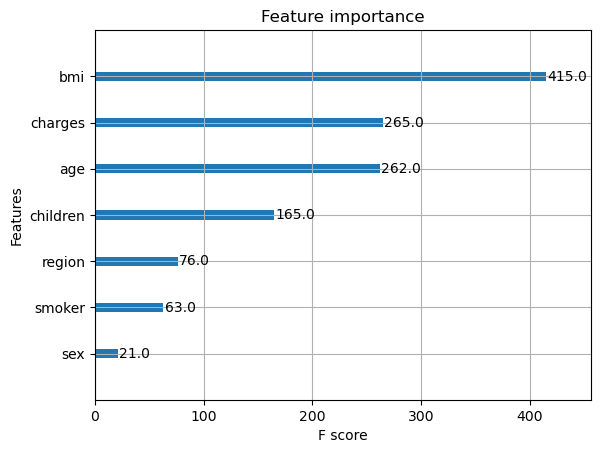

Model Variant  Accuracy Score
0    Full DataFrame        0.985075
1           Boolean        0.563433
2       Non-Boolean        0.966418
3       Categorical        0.712687
4   Non-Categorical        0.824627
5        Continuous        0.802239
6    Non-Continuous        0.791045
7  Key Contributors        0.985075

In [44]:
plot_importance(model_optimised)
plt.show()
def evaluate_model(feature_columns, df, ytrain, ytest):
    X = df[feature_columns]
    xtrain, xtest = train_test_split(X, test_size=0.2, random_state=42)
    model = XGBClassifier(eval_metric="logloss",
                                random_state=42,
                               subsample = 0.9,
                                reg_lambda = 0,
                                reg_alpha = 1,
                                n_estimators = 400,
                                min_child_weight = 1,
                                max_depth = 5,
                                learning_rate = 0.3,
                                gamma = 0,
                                colsample_bytree = 0.7)
    model.fit(xtrain, ytrain)
    preds = model.predict(xtest)
    return accuracy_score(ytest, preds)
feature_sets = {
    "Full DataFrame": ["age", "sex", "bmi", "children", "smoker", "region", "charges"],
    "Boolean": ["sex", "smoker"],
    "Non-Boolean": ["age", "bmi", "children", "region", "charges"],
    "Categorical": ["children", "region"],
    "Non-Categorical": ["age", "sex", "bmi", "smoker", "charges"],
    "Continuous": ["age", "bmi", "charges"],
    "Non-Continuous": ["sex", "children", "smoker", "region"],
    "Key Contributors": ["age", "bmi", "children", "smoker", "region", "charges"]}
accuracy_scores = {
    model_variant: evaluate_model(features, df_clean, ytrain, ytest, ) 
    for model_variant, features in feature_sets.items()}
accuracy_df = pd.DataFrame({
    "Model Variant": list(accuracy_scores.keys()),
    "Accuracy Score": list(accuracy_scores.values())})
accuracy_df

# Model Comparison

In [45]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
clf_optimal = DecisionTreeClassifier(max_depth=8, min_samples_split=5,criterion="gini",random_state=42)
clf_optimal.fit(xtrain, ytrain)
y_pred = clf_optimal.predict(xtest)
model_optimised = XGBClassifier(eval_metric="logloss",
                                random_state=42,
                               subsample = 0.9,
                                reg_lambda = 0,
                                reg_alpha = 1,
                                n_estimators = 400,
                                min_child_weight = 1,
                                max_depth = 5,
                                learning_rate = 0.3,
                                gamma = 0,
                                colsample_bytree = 0.7)
model_optimised.fit(xtrain, ytrain)
ypreds = model_optimised.predict(xtest)

## McNemar Test and Table

Usually, a test for the difference of two proportions can be carried out on our model’s error rate and if they are statistically different, but because our models are not independent since they are evaluated on the same test data, we must use the McNemar Test. The test compares the predictions made by the two models to each other. Specifically, comparing if the probability of classification model 1 captured that model 2 did not (B) to the probability of classification model 2 captured that model 1 did not (C). This would be the 3 classifications XGboost captured that the decision tree did not and the 2 classifications that Decision tree captured that XGboost did not, as shown below in the confusion matrix.

In [46]:
tb = mcnemar_table(y_target=ytest, 
                   y_model1=y_pred, 
                   y_model2=ypreds)
tb_df = pd.DataFrame(tb, 
                     columns=["XGBoost Correct", "XGBoost Incorrect"], 
                     index=["Decision Tree Correct", "Decision Tree Incorrect"])
display(tb_df)

XGBoost Correct  XGBoost Incorrect
Decision Tree Correct                261                  2
Decision Tree Incorrect                3                  2

Different authors argue that B + C should be either >5 , > 10 or >25 to use chi squared distribution with one degree of freedom. 

In [47]:
chi2, p = mcnemar(ary=tb, corrected=True)
print('McNemar test', chi2)
print('p-value:', p)

McNemar test 0.0
p-value: 1.0


In the event  that the data is too small, as in our case, a binomial test can be used to test the consistency. The Binomial distribution (n,P) should be used with n = B + C and P = 0.5 and the test statistic equal to B.

In [48]:
total_disagreements = 3 + 2
p_value = binomtest(3, n=total_disagreements, p=0.5, alternative='two-sided')
print('p-value:', p_value)

p-value: BinomTestResult(k=3, n=5, alternative='two-sided', statistic=0.6, pvalue=1.0)


The tests compare the distribution of counts expected under the null hypothesis that the two different classifiers make the same errors. As shown, we have an extremely strong McNemar Test statistic of 0.0 and a p value of 1.0, the same p value as the binomial test. Therefore, under the McNemar Test and supported by the Binomial test, we fail to reject the null hypothesis and conclude that the models make the same errors, and are therefore the difference in performance of our models is not statistically significant.

## Alpaydin's Combined 5x2cv F-test

The 5x2cv combined F-test is a procedure for comparing performance of models that is slightly more powerful than the McNemar’s test and recommended if computational efficiency is not an issue, as it is 10 times more computations than the McNemar’s test. We use the Alpaydin’s combined test as a more robust alternative to Dietterich’s 5x2cv paired t-test procedure. The test circumvents the issue of K-fold cross-validation paired t test and resampled paired t test that tend to conclude higher type 1 errors and therefore the classifiers perform differently more often than they must. The test splits the data into 2 fold, training both classifiers on the 1st fold and testing on the 2nd fold gaining error rates, then trained on the 2nd fold and tested on the first fold and then the difference is measured and an average is taken as the t statistic. The test follows a t distribution with 5 degrees of freedom and assumes a null hypothesis that the models perform equally. 

In [49]:
f, p = combined_ftest_5x2cv(estimator1=clf_optimal,
                            estimator2=model_optimised,
                            X=x, y=y,
                            random_seed=42)

print('F statistic: %.3f' % f)
print('p value: %.3f' % p)

F statistic: 0.901
p value: 0.587


We get a p value of 0.557, which is extremely strong, so we fail to reject the null hypothesis and conclude that the models perform equally. This supports our McNemar test and Binomial test that the classification models do not perform stasticially different.

# Final Conclusion

### Achievements  
Our project successfully leveraged machine learning to analyse a health insurance dataset and predict the likelihood of claims. Through exploratory data analysis, we identified key patterns and relationships within the data, enabling an informed selection of Decision Trees and XGBoost for predictive modelling. Both models were rigorously evaluated using metrics such as accuracy, precision, recall, F1 score, and stratified k-fold cross-validation. XGBoost demonstrated slightly superior performance, particularly in recall and F1 scores, while Decision Trees excelled in interpretability. Despite marginal differences in performance, Decision Trees were recommended for their clarity and computational simplicity, making them more suitable for transparent decision-making in the insurance domain. This project highlights the effectiveness of machine learning for addressing practical challenges in predictive analytics.

### Limitations  
The project faced several limitations that may impact the generalisability of its findings. The dataset contained only 1,337 rows and 8 features, which restricted the scope of analysis and limited the ability to capture complex patterns. Additionally, the hyperparameter tuning process was not exhaustive. For XGBoost, a randomised search was conducted, which may not have fully optimised the model. Similarly, Decision Trees were tuned with a grid search across a reduced parameter space, leaving potential improvements unexplored. These constraints may have slightly limited the models’ performance and their applicability to more complex datasets.

### Future Work  
To build upon this work, future efforts should focus on evaluating the models on larger datasets with more features to determine whether XGBoost’s superior performance scales effectively. Enhanced hyperparameter tuning, such as comprehensive grid searches for both models, could further optimise their predictive capabilities. Additionally, incorporating domain-specific features, such as detailed medical histories or regional socio-economic indicators, could improve the models’ accuracy and relevance. Exploring alternative algorithms or ensemble methods may also provide more robust solutions. These enhancements would not only address the limitations of the current study but also offer a deeper understanding of the factors influencing insurance claims, ultimately improving decision-making in the insurance industry.
